<h1>Análise para identificação de perfis de clientes de uma rede de e-commerce</h1>
<p><b>Instituição:</b> USP ESALQ</p>
<p><b>Ano</b>: 2023</p>
<p><b>Autor:</b> João Paulo Ribeiro dos Santos</p>
<p><b>Localização Projeto: </b> <a href = 'https://github.com/Joao-TheCosmosIsInfinite/Cluster-Analysis' target = "_blank">Git Hub</a></p>

[1. Bibliotecas/ Libs](#1)<br>
[2. Carregar Dados](#2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Analise Pre-liminar](#21)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Relacionamento das Bases](#22)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Dicionário dos Dados](#23)<br>
[3. Informação dos dataframes](#3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Dimensão](#31)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Dados Generalistas](#31)<br>

%pip install nb-mermaid


%%html
<script src="//cdn.rawgit.com/bollwyvl/53e64cdafba38461943b/raw/0815758d591dfaf0f4918b388aed1bf11d82160d/mermaid.full.js"></script>
<style>
    .mermaid *{font-family: sans-serif; }
    .mermaid .node, .mermaid .cluster{
      fill: white !important;
      stroke: black !important;
      stroke-width: 1px !important;
    }
    .mermaid div{
      text-align: center;
    }
    .mermaid .label{
      color: black;
    }
</style>
<script>$(function(){
    // mermaid load a touch weirdly: try immediately, but try again later if it's not available
    var initMermaid = function(){
        return (window.mermaid && mermaid.init()) || setTimeout(initMermaid, 50);         
    }
    initMermaid();

    // for live editing, re-render only the text of the current cell
    window.IPython && $(IPython.events).on("rendered.MarkdownCell", function(evt, data){
        // this is using a hacked mermaid that accepts some nodes!
        mermaid.init(undefined, data.cell.element.find(".mermaid"));
    });
});</script>

<a id ='1'></a>
<h3>1. Bibliotecas/ Libs</h3>

In [1]:
## Bibliotecas para análise inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os

## Utilidades
from matplotlib.gridspec import GridSpec
sys.path.append(os.path.abspath(os.path.join('..')))
from _functions.funcoes_data_viz import *
from _functions.funcoes_data_wrangling import *

## Bibliotecas de ML
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [2]:
## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_rows', 20)

## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_columns', 50)

<a id ='2'></a>
<h3>2. Carregar Dados</h3>

In [3]:
## Localização dos dados
path = os.path.abspath(os.path.join('..'))

## Objetos/ DataFrames

# Cliente
df_customers = pd.read_csv(path + '/output/olist_customers_dataset.csv')
# Itens de Pedido
df_order_items = pd.read_csv(path + '/output/olist_order_items_dataset.csv')
# Pagamentos de Pedido
df_order_payments = pd.read_csv(path + '/output/olist_order_payments_dataset.csv')
# Pedido
df_orders = pd.read_csv(path + '/output/olist_orders_dataset.csv')
# Produtos
df_products = pd.read_csv(path + '/output/olist_products_dataset.csv')
# Vendedores
df_sellers = pd.read_csv(path + '/output/olist_sellers_dataset.csv')

<a id ='21'></a>
<h4>2.1. Relacionamento das bases</h4>

Relacionamento das tabelas/ datasets

<img src='../img/table_relation.png' width="1000" height="1000">

<a id ='22'></a>
<h4>2.2. Dicionário dos dados</h4>

<h3>Customer</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>
    <tr><td>customer_id</td><td>Identificador único do cliente</td><td>Categórica Nominal</td></tr>
    <tr><td>customer_unique_id</td><td>Identificador único de algum documento do cliente</td><td>Categórica Nominal</td></tr>
    <tr><td>customer_zip_code_prefix</td><td>Código postal</td><td>Categórica Nominal</td></tr>
    <tr><td>customer_city</td><td>Cidade onde reside o cliente</td><td>Categórica Nominal</td></tr>
    <tr><td>customer_state</td><td>Estado onde reside o cliente</td><td>Categórica Nominal</td></tr>
</table>


<h3>Order Items</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>
    <tr><td>order_id</td><td>Identificador único do pedido</td><td>Categórica Nominal</td></tr>
    <tr><td>order_item_id</td><td>Identificador númerico referente ao item no pedido</td><td>Categórica Nominal</td></tr>
    <tr><td>product_id</td><td>Identificador único do produto</td><td>Categórica Nominal</td></tr>
    <tr><td>seller_id</td><td>Identificador único do vendedor</td><td>Categórica Nominal</td></tr>
    <tr><td>shipping_limit_date</td><td>Data limite de entrega</td><td>Numérica Contínua</td></tr>
    <tr><td>price</td><td>Preço do item no pedido</td><td>Numérica Contínua</td></tr>
    <tr><td>freight_value</td><td>Valor do frete cobrado</td><td>Numérica Contínua</td></tr>
</table>


<h3>Order Payments</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>
    <tr><td>order_id</td><td>Identificador único do pedido</td><td>Categórica Nominal</td></tr>
    <tr><td>payment_sequential</td><td>Identificador sequencial único do pagamento</td><td>Categórica Nominal</td></tr>
    <tr><td>payment_type</td><td>Tipo de pagamento</td><td>Categórica Nominal</td></tr>
    <tr><td>payment_installments</td><td>Número de parcelas</td><td>Numérica Discreta</td></tr>
    <tr><td>payment_value</td><td>Valor total do pagamento</td><td>Numérica Contínua</td></tr>
</table>


<h3>Orders</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>
    <tr><td>customer_id</td><td>Identificador único do cliente</td><td>Categórica Nominal</td></tr>
    <tr><td>order_status</td><td>Status do pedido</td><td>Categórica Nominal</td></tr>
    <tr><td>order_purchase_timestamp</td><td>Data de quando o pedido foi feito</td><td>Numérica Contínua</td></tr>
    <tr><td>order_approved_at</td><td>Data de quando o pedido foi aprovado</td><td>Numérica Contínua</td></tr>
    <tr><td>order_delivered_carrier_date</td><td>Data de quando foi entregue a transportadora</td><td>Numérica Contínua</td></tr>
    <tr><td>order_delivered_customer_date</td><td>Data de quando foi entregue ao cliente</td><td>Numérica Contínua</td></tr>
    <tr><td>order_estimated_delivery_date</td><td>Data estimada para entrega</td><td>Numérica Contínua</td></tr>
</table>


<h3>Products</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>    
    <tr><td>product_id</td><td>Identificador único do produto</td><td>Categórica Nominal</td></tr>
    <tr><td>product_category_name</td><td>Categoria do produto</td><td>Categórica Nominal</td></tr>
    <tr><td>product_name_lenght</td><td>Número de caracteres referentes ao nome</td><td>Numérica Discreta</td></tr>
    <tr><td>product_description_lenght</td><td>Número de caracteres referentes a descrição</td><td>Numérica Discreta</td></tr>
    <tr><td>product_photos_qty</td><td>Quantidade de fotos</td><td>Numérica Discreta</td></tr>
    <tr><td>product_weight_g</td><td>Peso em gramas</td><td>Numérica Contínua</td></tr>
    <tr><td>product_length_cm</td><td>Comprimento em centímetros</td><td>Numérica Contínua</td></tr>
    <tr><td>product_height_cm</td><td>Altura em centímetros</td><td>Numérica Contínua</td></tr>
    <tr><td>product_width_cm</td><td>Largura em centímetros</td><td>Numérica Contínua</td></tr>
</table>


<h3>Sellers</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>    
    <tr><td>seller_id</td><td>Identificador único do vendedor</td><td>Categórica Nominal</td></tr>
    <tr><td>seller_zip_code_prefix</td><td>Código postal do vendedor</td><td>Categórica Nominal</td></tr>
    <tr><td>seller_city</td><td>Cidade onde o vendedor reside</td><td>Categórica Nominal</td></tr>
    <tr><td>seller_state</td><td>Estado onde o vendedor reside</td><td>Categórica Nominal</td></tr>    
</table>

<a id ='23'></a>
<h4>2.3. Analise Preliminar</h4>

In [4]:
## Cliente
df_customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
## Item de Pedido
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [6]:
## Pagamento de Pedido
df_order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [7]:
## Pedido
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [8]:
## Produtos
df_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [9]:
## Vendedores
df_sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


<a id = '3'></a>
<h3>3. Informação dos dataframes</h3>

<a id ='31'></a>
<h4>3.1. Dimensão</h4>

In [10]:
## Dimensão do dataframe
print('Dimensão do dataframe "df_cutomers":',df_customers.shape)
print('Dimensão do dataframe "df_order_items":', df_order_items.shape)
print('Dimensão do dataframe "df_order_payments":',df_order_payments.shape)
print('Dimensão do dataframe "df_orders":',df_orders.shape)
print('Dimensão do dataframe "df_products":',df_products.shape)
print('Dimensão do dataframe "df_sellers":',df_sellers.shape)

Dimensão do dataframe "df_cutomers": (99441, 5)
Dimensão do dataframe "df_order_items": (112650, 7)
Dimensão do dataframe "df_order_payments": (103886, 5)
Dimensão do dataframe "df_orders": (99441, 8)
Dimensão do dataframe "df_products": (32951, 9)
Dimensão do dataframe "df_sellers": (3095, 4)


<a id ='32'></a>
<h4>3.2. Dados Generalistas</h4>

In [11]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
## Converter colunas de data para o tipo datetime
lst_columns = ['shipping_limit_date']
for x in lst_columns:
    df_order_items[x] = df_order_items[x].astype('datetime64[ns]')

In [14]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
## Converter colunas de data para o tipo datetime
lst_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for x in lst_columns:
    df_orders[x] = df_orders[x].astype('datetime64[ns]')

In [17]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [18]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [19]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


<a id = '4'></a>
<h3>4. Verificar valores nulos</h3>

In [20]:
## Quantidade de valores nulos por coluna
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
## Quantidade de valores nulos por coluna
df_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
## Quantidade de valores nulos por coluna
df_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [23]:
## Quantidade de valores nulos por coluna
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [24]:
## Porcentagem de valores nulos por coluna
df_orders.isnull().sum() / len(df_orders) * 100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [25]:
## Quantidade de valores nulos por coluna
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [26]:
## Porcentagem de valores nulos por coluna
df_products.isnull().sum() / len(df_orders) * 100

product_id                    0.000000
product_category_name         0.613429
product_name_lenght           0.613429
product_description_lenght    0.613429
product_photos_qty            0.613429
product_weight_g              0.002011
product_length_cm             0.002011
product_height_cm             0.002011
product_width_cm              0.002011
dtype: float64

In [27]:
## Quantidade de valores nulos por coluna
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Foram localizados dados nulos em dois dataframes, isso afeta em demasia tanto as analises exploratórias quanto os próprios modelos de machine learning, todavia, a proporção de dados nulos nos datasets varia 3% a menos de 1%. Tendo em vista que essa quantidade é baixa, os registros que contem esses valores nulos serão removidos da amostra. Essa abordagem foi baseada em um outro estudo utilizando técnicas de clusterização nesse mesmo dataset

<b>Fonte:</b> <br>
CARVALHO, Gabriel Alher. Algoritmos de clusterização e o modelo rfv (recência,
frequência e valor) aplicados em dados de e-commerce. Orientador: Mariana Kleina. 2022. 80 f. TCC (Graduação) – Curso de Engenharia de produção, Setor de tecnologia, Universidade Federal do Paraná, Curitiba, 2020. Disponível em: https://docs.ufpr.br/~marianakleina/TCC17.pdf

In [28]:
## Removendo Valores Nulos
for col in df_orders.columns[df_orders.isna().any()].tolist():
    df_orders = df_orders[pd.notnull(df_orders[col])]
    
## Verificar se ainda existem dados nulos
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [29]:
## Removendo Valores Nulos
for col in df_products.columns[df_products.isna().any()].tolist():
    df_products = df_products[pd.notnull(df_products[col])]

## Verificar se ainda existem dados nulos
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


<a id = '5'></a>
<h3>5. Análise Exploratória</h3>

<a id ='51'></a>
<h4>5.1. Analise Univariada</h4>

<a id = '511'></a>
<h5>5.1.1. Dataset df_customers </h5>

In [30]:
## Primeiros 5 Registros
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

As variáveis **customer_id** e **customer_unique_id** são variáveis que identificam um cliente, isto é, são id's. Logo não faz sentido descrevêla em detalhes, o máximo que pode ser feito é avaliar sua quantidade distinta.

In [31]:
print("Quantidade de Linhas: ", len(df_customers))
print("Quantidade Distinta de customer_id: ", df_customers['customer_id'].nunique())
print("Quantidade Distinta de customer_unique_id: ", df_customers['customer_unique_id'].nunique())

Quantidade de Linhas:  99441
Quantidade Distinta de customer_id:  99441
Quantidade Distinta de customer_unique_id:  96096


In [32]:
## Verificando valores duplicados
duplicateRows = df_customers[df_customers.duplicated(['customer_unique_id'])]\
                        .sort_values(by=['customer_unique_id', 'customer_id'])
duplicateRows

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
87012,d95f60d70d9ea9a7fe37c53c931940bb,004b45ec5c64187465168251cd1c9c2f,57035,maceio,AL
61403,f530197ea86ced9488a03d055e118ebf,0058f300f57d7b93c477a131a59b36c3,40731,salvador,BA
87414,cbb68c721ba9ddb30d8a490cc1897fa1,00a39521eb40f7012db50455bf083460,72595,brasilia,DF
...,...,...,...,...,...
88272,09c682ef897935e677a0996cfe2008f3,ff44401d0d8f5b9c54a47374eb48c1b8,13070,campinas,SP
92931,62a2c35611e8757e40fbbcecb3c9b2bd,ff8892f7c26aa0446da53d01b18df463,45972,ibiraja,BA
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP


<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

Foram identificados valores duplicados no campo customer_unique_id, que é um dos campos que compoe o id do cliente. Não é o campo utilizado no join, portanto não afetará a analise em nada, mas é um bom ponto de atenção, dado que um mesmo cliente pode ter mais de um cadastro na plataforma, pode ser desde um bug até uma característica distinta do negócio.

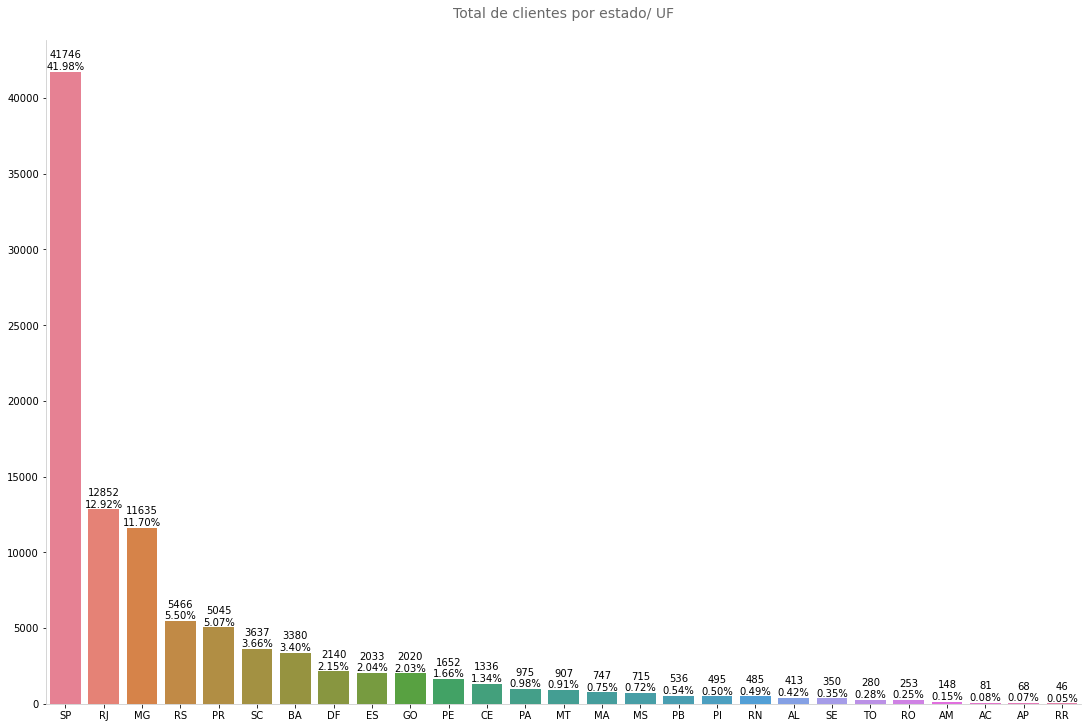

In [33]:
## Total de Clientes por Estado
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

bar_count_plot(df_customers, 
               x='customer_state', 
               order=True,
               ax=ax1,
               title='Total de clientes por estado/ UF')
ax1.set_ylabel('')
ax1.set_xlabel('')
plt.show()

In [34]:
## Total de clientes por cidade
df_customers['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

Cerca de 82% dos clientes são da região Sul e Sudeste e existem os clientes estão bem espalhados entre municipios, embora haja concentração deles nas capitais.

<a id = '512'></a>
<h5>5.1.2. Dataset df_order_items </h5>

In [35]:
## Primeiros 5 Registros
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

Essa tabela se refere aos itens de pedido portanto haverão valores duplicados para os dados referentes a **order_id** e **seller_id**, pois um mesmo pedido pode ter mais de um produto, e um mesmo pedido pode ter produtos de um mesmo vendedor.

In [36]:
## Menor data limite de entrega
print ("Menor data limite de entrega: ", df_order_items.shipping_limit_date.min())
## Maior data limite de entrega
print ("Maior data limite de entrega: ", df_order_items.shipping_limit_date.max())

Menor data limite de entrega:  2016-09-19 00:15:34
Maior data limite de entrega:  2020-04-09 22:35:08


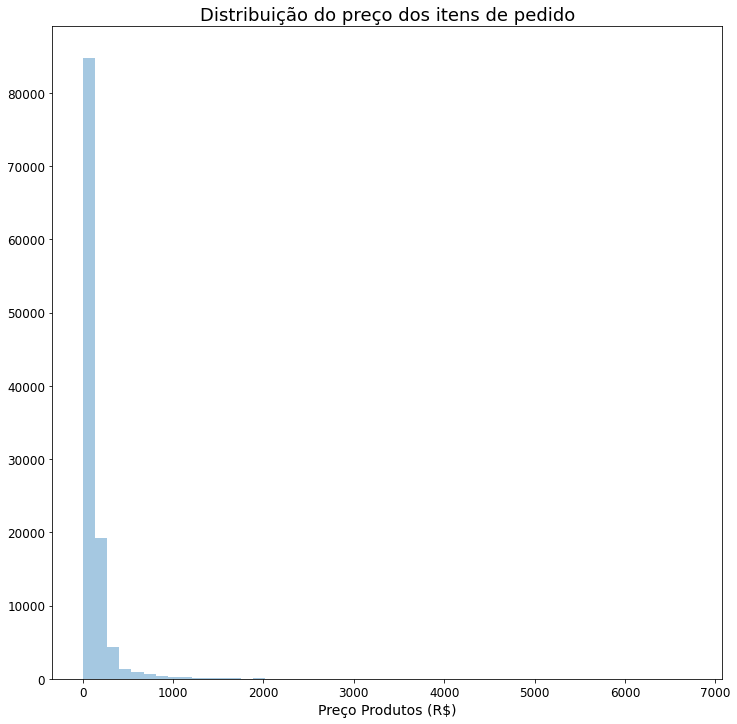

In [37]:
## Tamanho da figura
plt.figure(figsize=(12, 12))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_order_items['price'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('Preço Produtos (R$)',
           fontsize = 14)

## Titulo
plt.title('Distribuição do preço dos itens de pedido', 
          fontsize = 18)

## Exibir
plt.show()

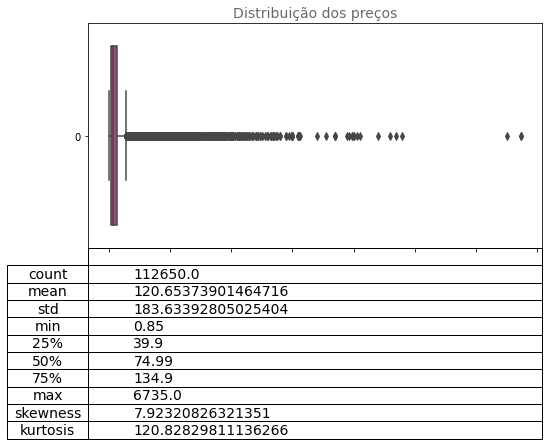

In [38]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_order_items, column='price', ax=ax, title='Distribuição dos preços', palette='magma')

In [39]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_order_items, 'price', 5)

data_bins,price,percent(%)
"(-5.884, 1347.68]",112201,99.601420
"(1347.68, 2694.51]",403,0.357745
"(2694.51, 4041.34]",37,0.032845
"(4041.34, 5388.17]",6,0.005326
"(5388.17, 6735.0]",3,0.002663


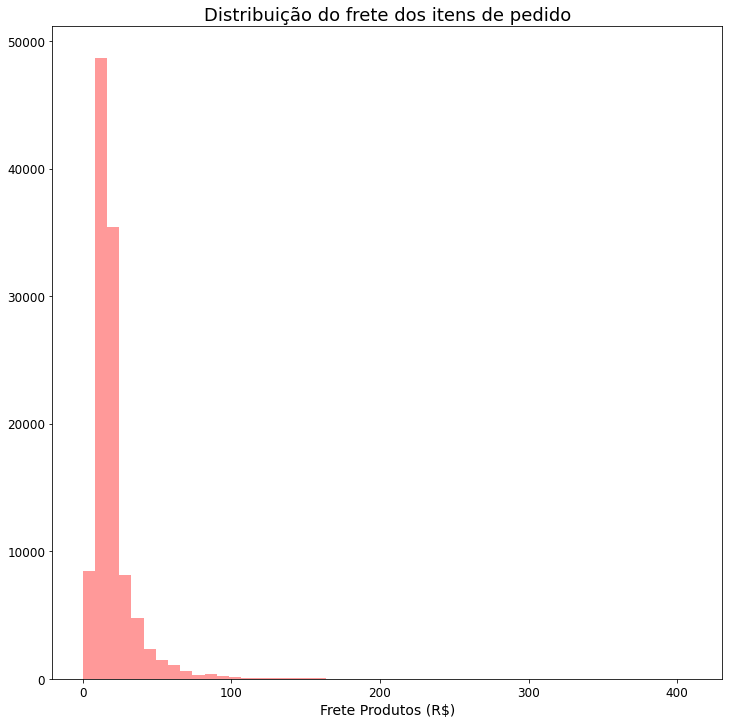

In [40]:
## Tamanho da figura
plt.figure(figsize=(12, 12))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_order_items['freight_value'], color = 'red',
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('Frete Produtos (R$)',
           fontsize = 14)

## Titulo
plt.title('Distribuição do frete dos itens de pedido', 
          fontsize = 18)

## Exibir
plt.show()

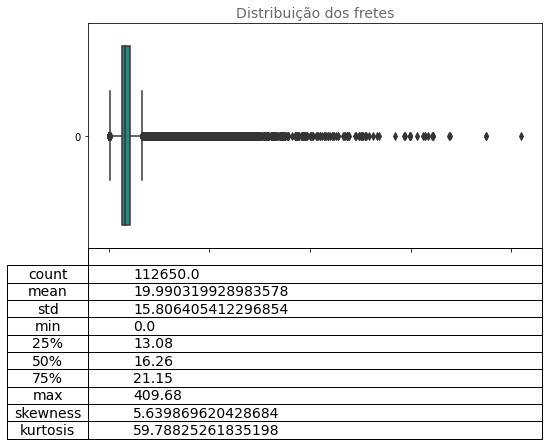

In [41]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_order_items, column='freight_value', ax=ax, title='Distribuição dos fretes')

In [42]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_order_items, 'freight_value', 5)

data_bins,freight_value,percent(%)
"(-0.41, 81.936]",111384,98.876165
"(81.936, 163.872]",1118,0.992455
"(163.872, 245.808]",111,0.098535
"(245.808, 327.744]",32,0.028407
"(327.744, 409.68]",5,0.004439


<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

**99.6%** dos itens de pedido estão na faixa _0 até 1347_, indicando que no geral os itens de pedido são baratos, a esmagadora maioria dos produtos comprados são produtos com baixo valor agregado.

Um cenário similar é eoncotrado no frete onde **98.8%** dos fretes pagos estão na faixa _0 até 81_, isso pode estar relacionado ao valor do produto que é barato ou TALVEZ UM PERFIL DE CLIENTE que adquire produtos com frete baixo, ou de vendedores próximos

<a id = '513'></a>
<h5>5.1.3. Dataset df_order_payments </h5>

In [43]:
## Primeiros 5 Registros
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

Essa tabela se refere aos pagamentos de pedido portanto haverão valores duplicados para os dados referentes a **order_id** pois um mesmo pedido pode ter mais de uma forma de pagamento.

In [44]:
## Sequencial de pagamento do pedido
df_order_payments.payment_sequential.value_counts()

1     99360
2      3039
3       581
4       278
5       170
      ...  
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, Length: 29, dtype: int64

Como o sequencial de pagamento é bem puverizado em termos de valor, onde temos de 1 tipo de pagamento até 27, que se faz necessario criar categorias para esses sequenciais, facilitando assim as análises

In [45]:
## Pedidos que tiveram MAIS de um tipo de pagamento
condition = df_order_payments[df_order_payments['payment_sequential']>1]['order_id']
## Criar coluna identificando que o pedido teve apenas um tipo de pagamento
df_order_payments['only_1_payment'] = np.where(df_order_payments['order_id'].isin(condition), False, True)

In [46]:
## Estabelecer condicoes para as categorias
conditions = [df_order_payments['only_1_payment'] == True, 
              (df_order_payments['payment_sequential'] <= 5) & (df_order_payments['only_1_payment'] == False), 
              (df_order_payments['payment_sequential'] <= 10) & (df_order_payments['only_1_payment'] == False), 
              (df_order_payments['payment_sequential'] <= 20) & (df_order_payments['only_1_payment'] == False),
              (df_order_payments['payment_sequential'] <= 30) & (df_order_payments['only_1_payment'] == False)]
## Nome das categorias
choices     = [ "apenas_1", "menor_igual_5", 'menor_igual_10', 'menor_igual_20', 'menor_igual_30']
## Coluna com as categorias
df_order_payments["payment_sequential_categ"] = np.select(conditions, choices, default=np.nan)

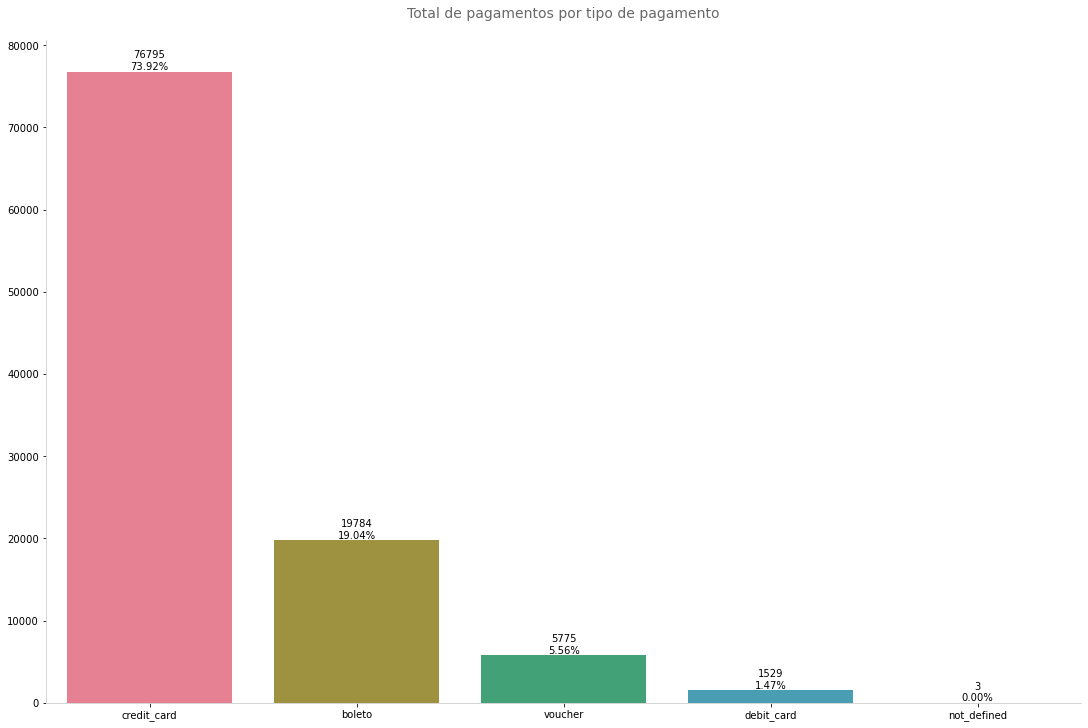

In [47]:
## Total de pagamentos por tipo de pagamento
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

bar_count_plot(df_order_payments, 
               x='payment_type', 
               order=True,
               ax=ax1,
               title='Total de pagamentos por tipo de pagamento')
ax1.set_ylabel('')
ax1.set_xlabel('')
plt.show()

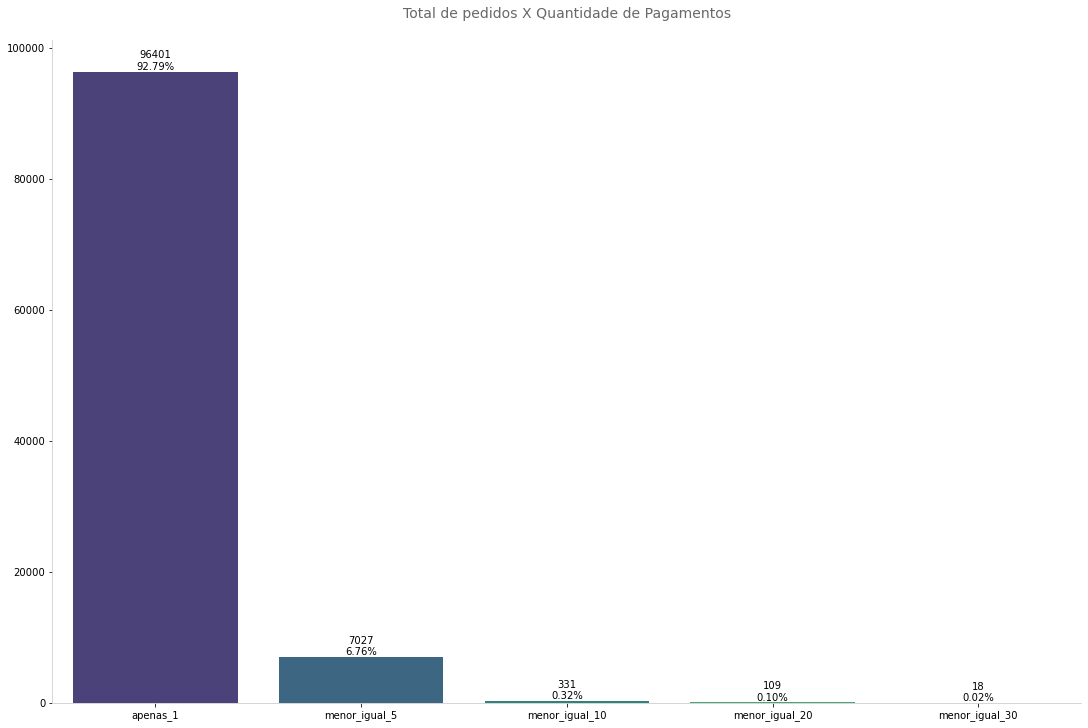

In [48]:
## Total de pagamentos por tipo de pagamento
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

bar_count_plot(df_order_payments, 
               x='payment_sequential_categ', 
               order=True,
               palette='viridis',
               ax=ax1,
               title='Total de pedidos X Quantidade de Pagamentos')
ax1.set_ylabel('')
ax1.set_xlabel('')
plt.show()

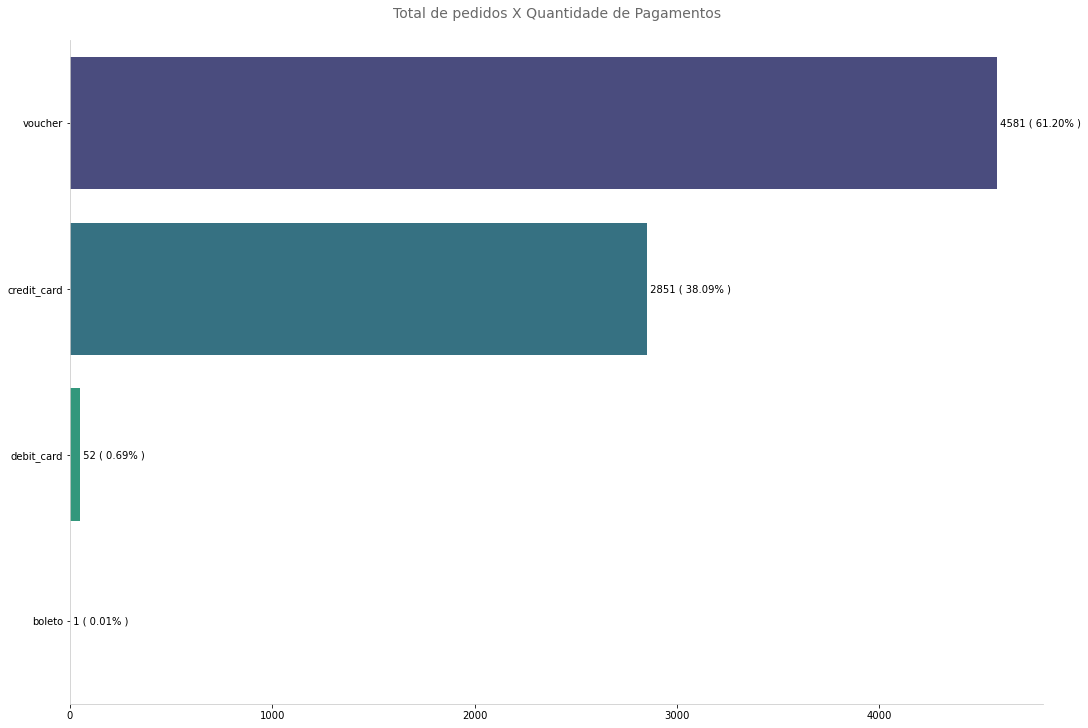

In [49]:
## Total de pagamentos por tipo de pagamento
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

bar_count_plot(df_order_payments[df_order_payments['payment_sequential_categ']!= 'apenas_1'], 
               y='payment_type', 
               order=True,
               palette='viridis',
               ax=ax1,
               title='Total de pedidos X Quantidade de Pagamentos')
ax1.set_ylabel('')
ax1.set_xlabel('')
plt.show()

Analisando tipos de pagamento x quantidade de pagamentos feitos

In [50]:
df_order_payments.groupby(['payment_sequential_categ','payment_type']).count()['order_id'].reset_index()

,payment_sequential_categ,payment_type,order_id
0,apenas_1,boleto,19783
1,apenas_1,credit_card,73944
2,apenas_1,debit_card,1477
3,apenas_1,not_defined,3
4,apenas_1,voucher,1194
5,menor_igual_10,voucher,331
6,menor_igual_20,voucher,109
7,menor_igual_30,voucher,18
8,menor_igual_5,boleto,1
9,menor_igual_5,credit_card,2851


In [51]:
df_order_payments.groupby(['payment_sequential_categ','payment_type']).count().apply(lambda x: x*100/x.sum())['order_id'].reset_index()

,payment_sequential_categ,payment_type,order_id
0,apenas_1,boleto,19.042989
1,apenas_1,credit_card,71.178022
2,apenas_1,debit_card,1.421751
3,apenas_1,not_defined,0.002888
4,apenas_1,voucher,1.149337
5,menor_igual_10,voucher,0.318618
6,menor_igual_20,voucher,0.104923
7,menor_igual_30,voucher,0.017327
8,menor_igual_5,boleto,0.000963
9,menor_igual_5,credit_card,2.744354


<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

Cerca de **92%** dos pedidos tem apenas um tipo de pagamento, onde **72%** pagaram com cartão de crédito <br>
Aproximadamente **61%** dos pedidos, que possuem mais de um tipo de pagamento, fazem uso de **Voucher**

In [52]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_order_payments, 'payment_installments', 4)

data_bins,payment_installments,percent(%)
"(-0.024, 6.0]",91679,88.249620
"(6.0, 12.0]",12022,11.572300
"(12.0, 18.0]",145,0.139576
"(18.0, 24.0]",40,0.038504


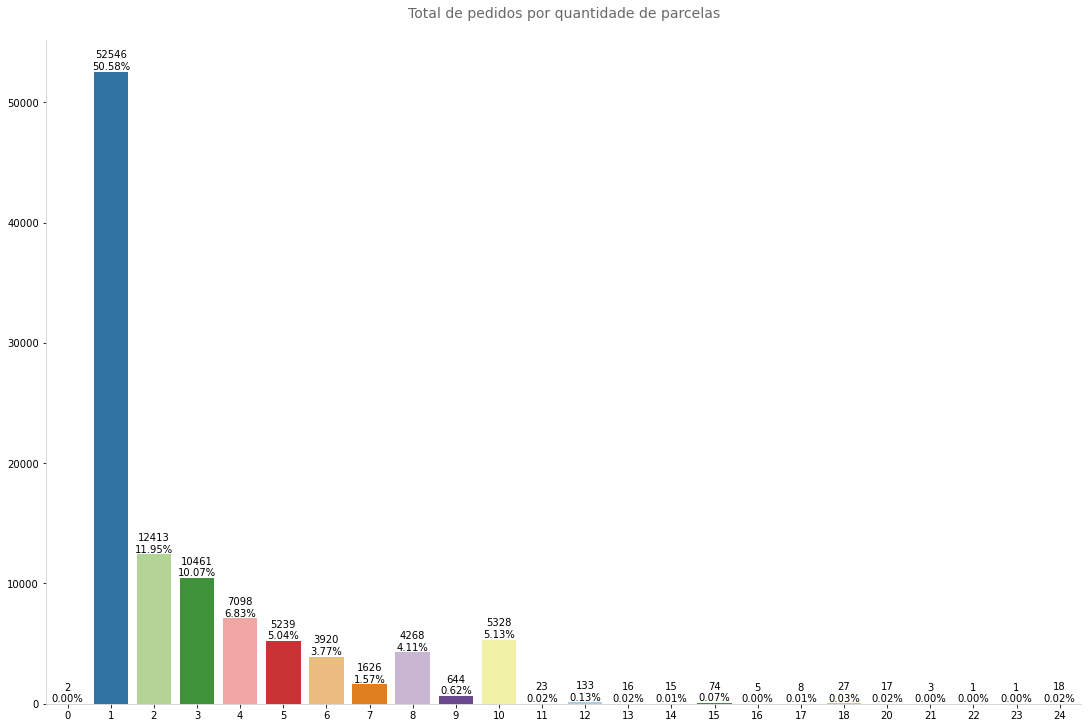

In [53]:
## Total de pagamentos por tipo de pagamento
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

bar_count_plot(df_order_payments, 
               x='payment_installments',                
               palette='Paired',
               ax=ax1,
               title='Total de pedidos por quantidade de parcelas')
ax1.set_ylabel('')
ax1.set_xlabel('')
plt.show()

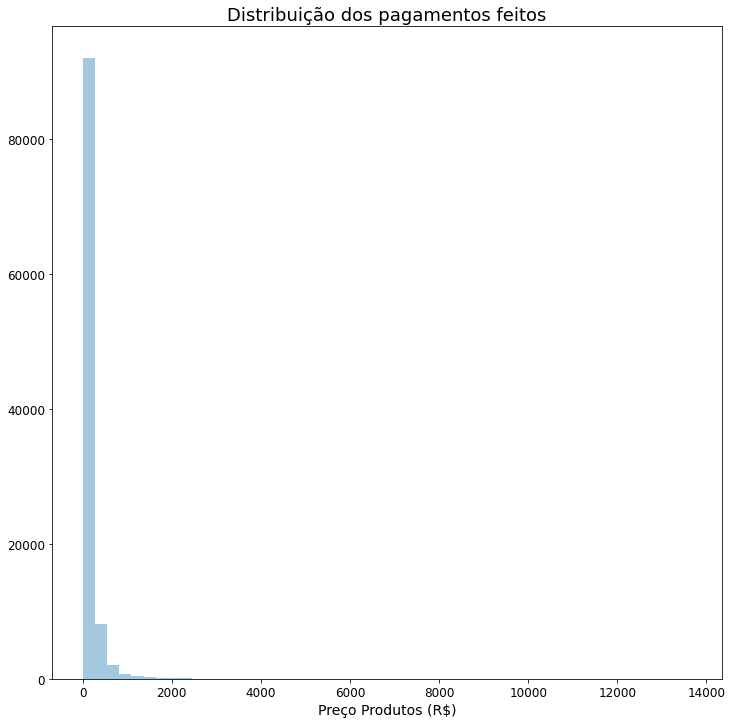

In [54]:
## Tamanho da figura
plt.figure(figsize=(12, 12))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_order_payments['payment_value'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('Preço Produtos (R$)',
           fontsize = 14)

## Titulo
plt.title('Distribuição dos pagamentos feitos', 
          fontsize = 18)

## Exibir
plt.show()

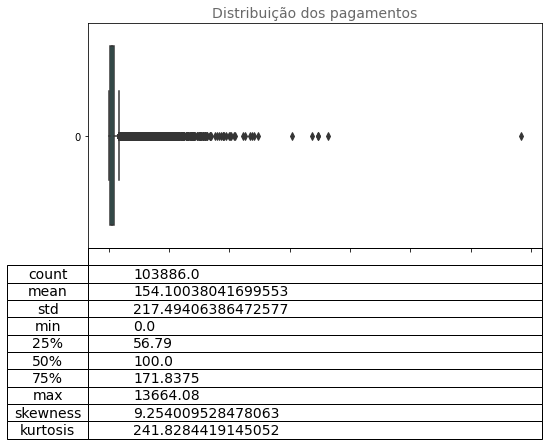

In [55]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_order_payments, column='payment_value', ax=ax, title='Distribuição dos pagamentos', palette='viridis')

In [56]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_order_payments, 'payment_value', 6)

data_bins,payment_value,percent(%)
"(-13.664, 2277.347]",103771,99.889302
"(2277.347, 4554.693]",105,0.101072
"(4554.693, 6832.04]",6,0.005776
"(6832.04, 9109.387]",3,0.002888
"(9109.387, 11386.733]",0,0.000000
"(11386.733, 13664.08]",1,0.000963


<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

Cerca de **50%** estão associados a pagamentos de apenas 1 parcela.<br>
Mais de **99%** dos pedidos tem entre 1 e 12 parcelas.<br>
**99%** dos pagamentos estão entre 0 e 2277 reais.

<a id = '514'></a>
<h5>5.1.4. Dataset df_orders </h5>

In [57]:
## Primeiros 5 Registros
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [58]:
## Verificando se existem valores duplicados
df_orders[df_orders.duplicated(['order_id'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [59]:
## Verificando se existem valores duplicados
df_orders[df_orders.duplicated(['customer_id'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [60]:
## Data do pedido
print ("Menor data: ", df_orders.order_purchase_timestamp.min(), 
       "\nMaior data: ", df_orders.order_purchase_timestamp.max())

Menor data:  2016-09-15 12:16:38 
Maior data:  2018-08-29 15:00:37


In [61]:
## Data de aprovação do pedido
print ("Menor data: ", df_orders.order_approved_at.min(), 
       "\nMaior data: ", df_orders.order_approved_at.max())

Menor data:  2016-09-15 12:16:38 
Maior data:  2018-08-29 15:10:26


In [62]:
## Data de envio a transportadora
print ("Menor data: ", df_orders.order_delivered_carrier_date.min(), 
       "\nMaior data: ", df_orders.order_delivered_carrier_date.max())

Menor data:  2016-10-08 10:34:01 
Maior data:  2018-09-11 19:48:28


In [63]:
## Data estimada de entrega do pedido para o cliente
print ("Menor data: ", df_orders.order_estimated_delivery_date.min(), 
       "\nMaior data: ", df_orders.order_estimated_delivery_date.max())

Menor data:  2016-10-04 00:00:00 
Maior data:  2018-10-25 00:00:00


In [64]:
## Data de entrega do pedido para o cliente
print ("Menor data: ", df_orders.order_delivered_customer_date.min(), 
       "\nMaior data: ", df_orders.order_delivered_customer_date.max())

Menor data:  2016-10-11 13:46:32 
Maior data:  2018-10-17 13:22:46


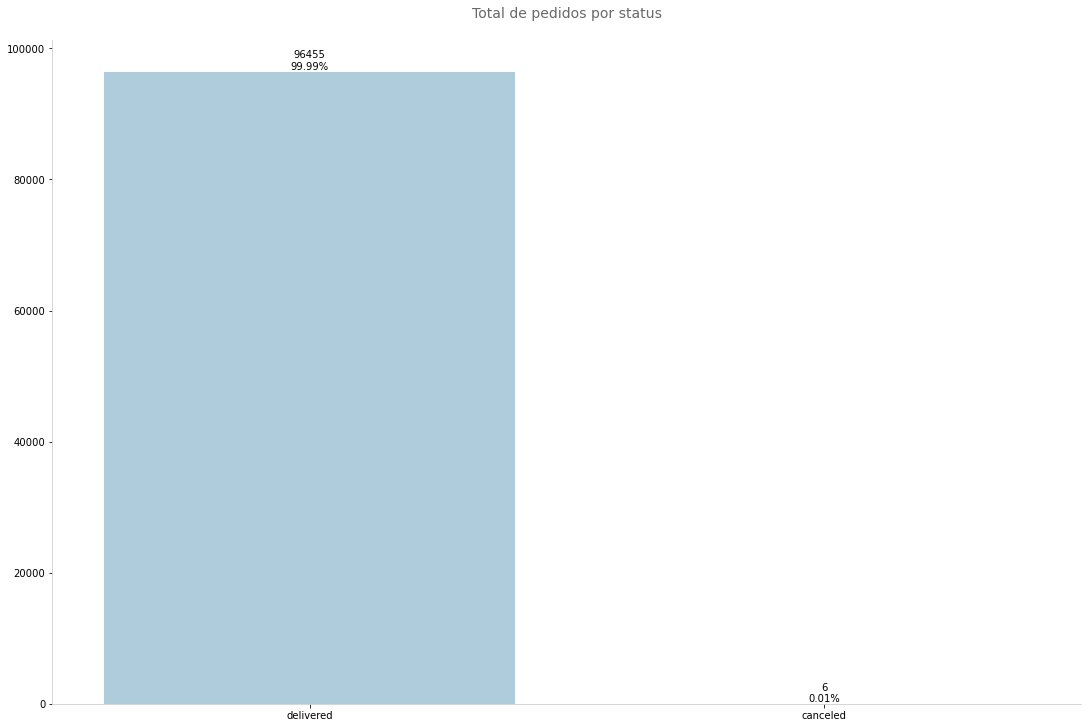

In [65]:
## Total de pagamentos por tipo de pagamento
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

bar_count_plot(df_orders, 
               x='order_status',                
               palette='Paired',
               ax=ax1,
               title='Total de pedidos por status')
ax1.set_ylabel('')
ax1.set_xlabel('')
plt.show()

Dado os muitos campos referentes a data, que serão criadas novos campos mostrando a diferença dessas datas

In [66]:
## Horas entre compra e aprovação do pedido
df_orders['diff_hours_purchase_approved'] = (df_orders['order_approved_at'] - df_orders['order_purchase_timestamp']) / np.timedelta64(1, 'h')
## Horas entre compra e envio para a transportadora
df_orders['diff_hours_carries_purchase'] = (df_orders['order_delivered_carrier_date'] - df_orders['order_purchase_timestamp']) / np.timedelta64(1, 'h')
## Horas entre entrega ao cliente e envio a transportadora
df_orders['diff_hours_customer_carrier'] = (df_orders['order_delivered_customer_date'] - df_orders['order_delivered_carrier_date']) / np.timedelta64(1, 'h')
## Dias entre compra e entrega ao cliente
df_orders['diff_days_customer_purchase'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']) / np.timedelta64(1, 'D')
## Dias entre entrega ao cliente e entrega estimada
df_orders['diff_days_customer_estimated'] = (df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']) / np.timedelta64(1, 'D')

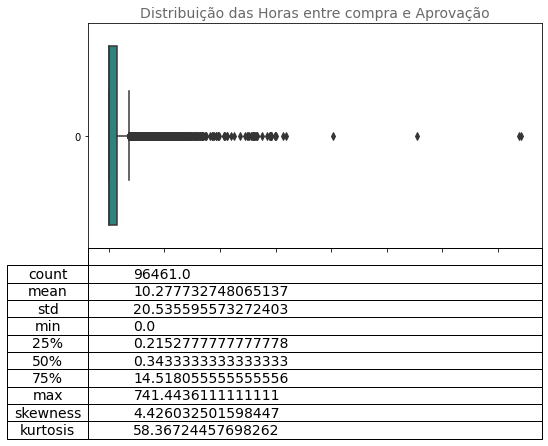

In [67]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_orders, column='diff_hours_purchase_approved', ax=ax, title='Distribuição das Horas entre compra e Aprovação', palette='viridis')

In [68]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_orders, 'diff_hours_purchase_approved', 10)

data_bins,diff_hours_purchase_approved,percent(%)
"(-0.741, 74.144]",94384,97.846798
"(74.144, 148.289]",1983,2.055753
"(148.289, 222.433]",54,0.055981
"(222.433, 296.577]",31,0.032137
"(296.577, 370.722]",5,0.005183
"(370.722, 444.866]",1,0.001037
"(444.866, 519.011]",0,0.000000
"(519.011, 593.155]",1,0.001037
"(593.155, 667.299]",0,0.000000
"(667.299, 741.444]",2,0.002073


Analisando o tempo entre a compra do pedido e envio a transportadora

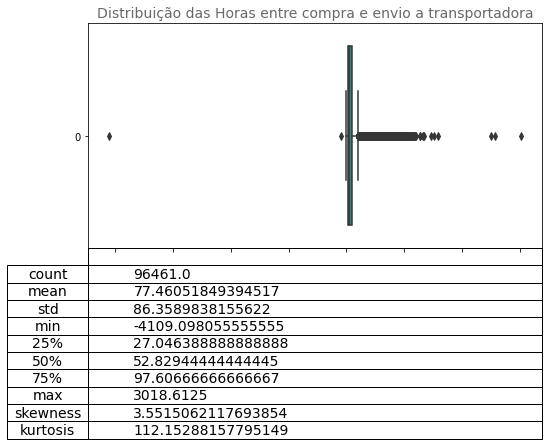

In [69]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_orders, column='diff_hours_carries_purchase', ax=ax, title='Distribuição das Horas entre compra e envio a transportadora', palette='viridis')

In [70]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_orders, 'diff_hours_carries_purchase', 10)

data_bins,diff_hours_carries_purchase,percent(%)
"(-4116.226, -3396.327]",1,0.001037
"(-3396.327, -2683.556]",0,0.000000
"(-2683.556, -1970.785]",0,0.000000
"(-1970.785, -1258.014]",0,0.000000
"(-1258.014, -545.243]",0,0.000000
"(-545.243, 167.528]",88419,91.662952
"(167.528, 880.299]",7943,8.234416
"(880.299, 1593.07]",95,0.098485
"(1593.07, 2305.841]",0,0.000000
"(2305.841, 3018.612]",3,0.003110


Foram identificados incongruências, onde temos pedidos cuja data de envio a transportadora é menor do que a data do pedido propriamente dito. Isso não faz o menor sentido, pois o pedido precisa ser feito antes de ser enviado a transportadora. Necessário verificar algum pedido de exemplo

In [71]:
## Verificando pedidos
df_orders[df_orders["diff_hours_carries_purchase"] < 0].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_hours_purchase_approved,diff_hours_carries_purchase,diff_hours_customer_carrier,diff_days_customer_purchase,diff_days_customer_estimated
615,b9afddbdcfadc9a87b41a83271c3e888,85c6af75161b8b2b1af98e82b5a6a5a5,delivered,2018-08-16 13:50:48,2018-08-16 14:05:13,2018-08-16 13:27:00,2018-08-24 14:58:37,2018-09-04,0.240278,-0.396667,193.526944,8.047095,10.375961
1111,ad133696906f6a78826daa0911b7daec,e6f5b234bb0d847f10eebd70130c5d49,delivered,2018-06-15 15:41:22,2018-06-15 16:19:23,2018-06-15 14:52:00,2018-06-22 18:09:37,2018-07-18,0.633611,-0.822778,171.293611,7.102951,25.243322
1329,74e033208dc13a7b8127eb8e73d09b76,72fcbb1145f2889eddcba6d6c1d6c090,delivered,2018-05-02 10:48:44,2018-05-02 11:13:45,2018-05-02 09:49:00,2018-05-07 23:06:36,2018-05-29,0.416944,-0.995556,133.293333,5.512407,21.037083
1372,a6b58794fd2ba533359a76c08df576e3,ccd8e3459ad58ae538c9d2cf35532ba4,delivered,2018-05-14 15:18:23,2018-05-14 15:33:35,2018-05-14 13:46:00,2018-05-19 19:33:32,2018-06-08,0.253333,-1.539722,125.792222,5.177187,19.185046
1864,5792e0b1c8c8a2bf53af468c9a422c88,5c427f06e7fcf902e309743516e2c580,delivered,2018-07-26 13:25:14,2018-07-26 13:35:14,2018-07-26 12:42:00,2018-07-30 14:45:02,2018-08-09,0.166667,-0.720556,98.050556,4.055417,9.385394


In [72]:
print("## Numero de pedidos que foram para a transportadora antes de terem sido lançados: ", len(df_orders[df_orders["diff_hours_carries_purchase"] < 0]))
print("## Numero de pedidos que foram para a transportadora após de terem sido lançados: ", len(df_orders[df_orders["diff_hours_carries_purchase"] >= 0]))

## Numero de pedidos que foram para a transportadora antes de terem sido lançados:  165
## Numero de pedidos que foram para a transportadora após de terem sido lançados:  96296


O número de pedido nesse cenário incomum ,e inferior a 0,2% da amostra, sendo assim tais pedidos serão removidos, pois claramente trata-se de um erro nos dados, oriundo dos mais diversos cenários, desde lançamento errado em algum sistema, ou erro devido a fuso horário

In [73]:
## Estabelecendo condições de remoção
condition = df_orders[df_orders['diff_hours_carries_purchase'] < 0]['order_id']
## Removendo pedidos
df_orders = df_orders[~df_orders['order_id'].isin(condition)]

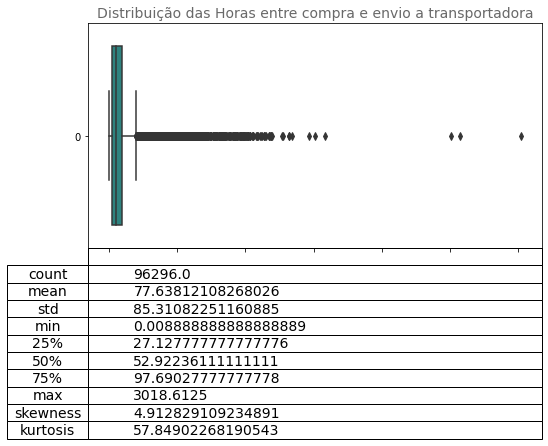

In [74]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_orders, column='diff_hours_carries_purchase', ax=ax, title='Distribuição das Horas entre compra e envio a transportadora', palette='viridis')

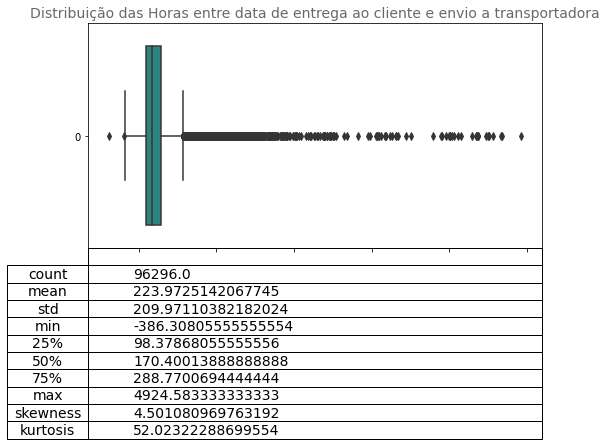

In [75]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_orders, column='diff_hours_customer_carrier', ax=ax, title='Distribuição das Horas entre data de entrega ao cliente e envio a transportadora', palette='viridis')

In [76]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_orders, 'diff_hours_customer_carrier', 10)

data_bins,diff_hours_customer_carrier,percent(%)
"(-391.619, 144.781]",37782,39.235275
"(144.781, 675.87]",55279,57.405292
"(675.87, 1206.959]",2816,2.924317
"(1206.959, 1738.048]",309,0.320886
"(1738.048, 2269.138]",45,0.046731
"(2269.138, 2800.227]",23,0.023885
"(2800.227, 3331.316]",15,0.015577
"(3331.316, 3862.405]",4,0.004154
"(3862.405, 4393.494]",16,0.016615
"(4393.494, 4924.583]",7,0.007269


In [77]:
print("## Numero de pedidos que foram para o cliente antes de terem ido para a transportadora: ", len(df_orders[df_orders["diff_hours_customer_carrier"] < 0]))
print("## Numero de pedidos que foram para o cliente após de terem ido para a transportadora: ", len(df_orders[df_orders["diff_hours_customer_carrier"] >= 0]))

## Numero de pedidos que foram para o cliente antes de terem ido para a transportadora:  23
## Numero de pedidos que foram para o cliente após de terem ido para a transportadora:  96273


Outro cenário de divergencia de datas.

Será aplicado o mesmo tratamento

In [78]:
## Estabelecendo condições de remoção
condition = df_orders[df_orders['diff_hours_customer_carrier'] < 0]['order_id']
## Removendo pedidos
df_orders = df_orders[~df_orders['order_id'].isin(condition)]

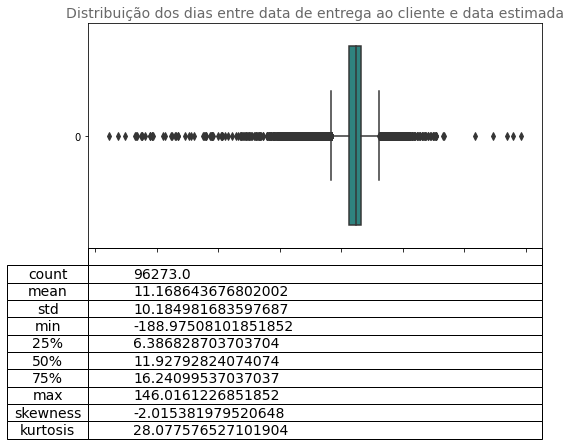

In [79]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_orders, column='diff_days_customer_estimated', ax=ax, title='Distribuição dos dias entre data de entrega ao cliente e data estimada', palette='viridis')

In [80]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_orders, 'diff_days_customer_estimated', 10)

data_bins,diff_days_customer_estimated,percent(%)
"(-189.31, -155.476]",11,0.011426
"(-155.476, -121.977]",14,0.014542
"(-121.977, -88.478]",23,0.023890
"(-88.478, -54.979]",51,0.052974
"(-54.979, -21.479]",687,0.713596
"(-21.479, 12.02]",47703,49.549718
"(12.02, 45.519]",47577,49.418840
"(45.519, 79.018]",200,0.207743
"(79.018, 112.517]",3,0.003116
"(112.517, 146.016]",4,0.004155


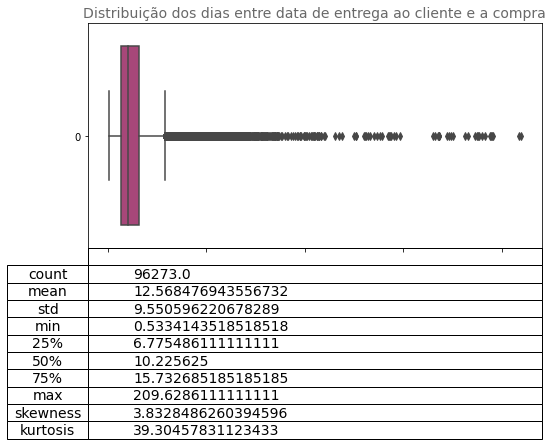

In [81]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_orders, column='diff_days_customer_purchase', ax=ax, title='Distribuição dos dias entre data de entrega ao cliente e a compra', palette='magma')

In [82]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_orders, 'diff_days_customer_purchase', 10)

data_bins,diff_days_customer_purchase,percent(%)
"(0.324, 21.443]",84573,87.847060
"(21.443, 42.352]",10309,10.708091
"(42.352, 63.262]",1135,1.178939
"(63.262, 84.171]",164,0.170349
"(84.171, 105.081]",36,0.037394
"(105.081, 125.991]",14,0.014542
"(125.991, 146.9]",17,0.017658
"(146.9, 167.81]",4,0.004155
"(167.81, 188.719]",13,0.013503
"(188.719, 209.629]",8,0.008310


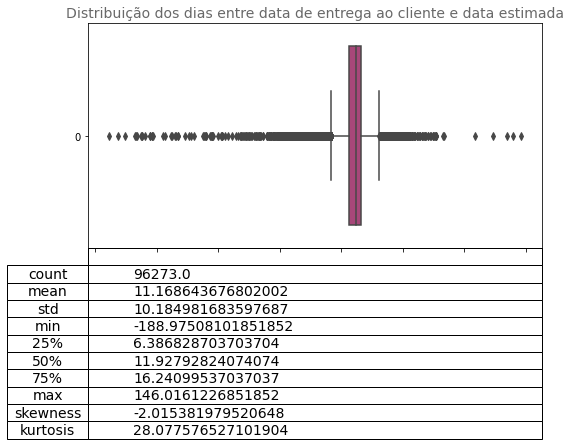

In [83]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_orders, column='diff_days_customer_estimated', ax=ax, title='Distribuição dos dias entre data de entrega ao cliente e data estimada', palette='magma')

In [84]:
## Verificar a distribuição dos dados em faixas
data_bin_cut(df_orders, 'diff_days_customer_estimated', 10)

data_bins,diff_days_customer_estimated,percent(%)
"(-189.31, -155.476]",11,0.011426
"(-155.476, -121.977]",14,0.014542
"(-121.977, -88.478]",23,0.023890
"(-88.478, -54.979]",51,0.052974
"(-54.979, -21.479]",687,0.713596
"(-21.479, 12.02]",47703,49.549718
"(12.02, 45.519]",47577,49.418840
"(45.519, 79.018]",200,0.207743
"(79.018, 112.517]",3,0.003116
"(112.517, 146.016]",4,0.004155


In [85]:
print("## Numero de pedidos cujo estimado foi menor do que a data real de entrega: ", len(df_orders[df_orders["diff_days_customer_estimated"] < 0]))
print("## Numero de pedidos foram entregues antes do projetado: ", len(df_orders[df_orders["diff_days_customer_estimated"] >= 0]))

## Numero de pedidos cujo estimado foi menor do que a data real de entrega:  7823
## Numero de pedidos foram entregues antes do projetado:  88450


<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

Mais de **8%** dos pedidos foram entregues com atraso.<br>
O tempo médio entre a entrega do pedido e sua criação é de **12 dias**, sendo que em **87%** dos casos os pedidos foram entregues antes de **22 dias**.<br>
Em **97%** dos casos os pedidos demoram até **75 horas** para serem aprovados.<br>
Após a criação do pedido, demora-se em média **77 horas** para seu respectivo envio à transportadora


<a id = '515'></a>
<h5>5.1.5. Dataset df_products </h5>

In [86]:
## Primeiros 5 Registros
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [87]:
## Verificando se há valores duplicados
duplicateRows = df_products[df_products.duplicated(['product_id'])]
duplicateRows

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


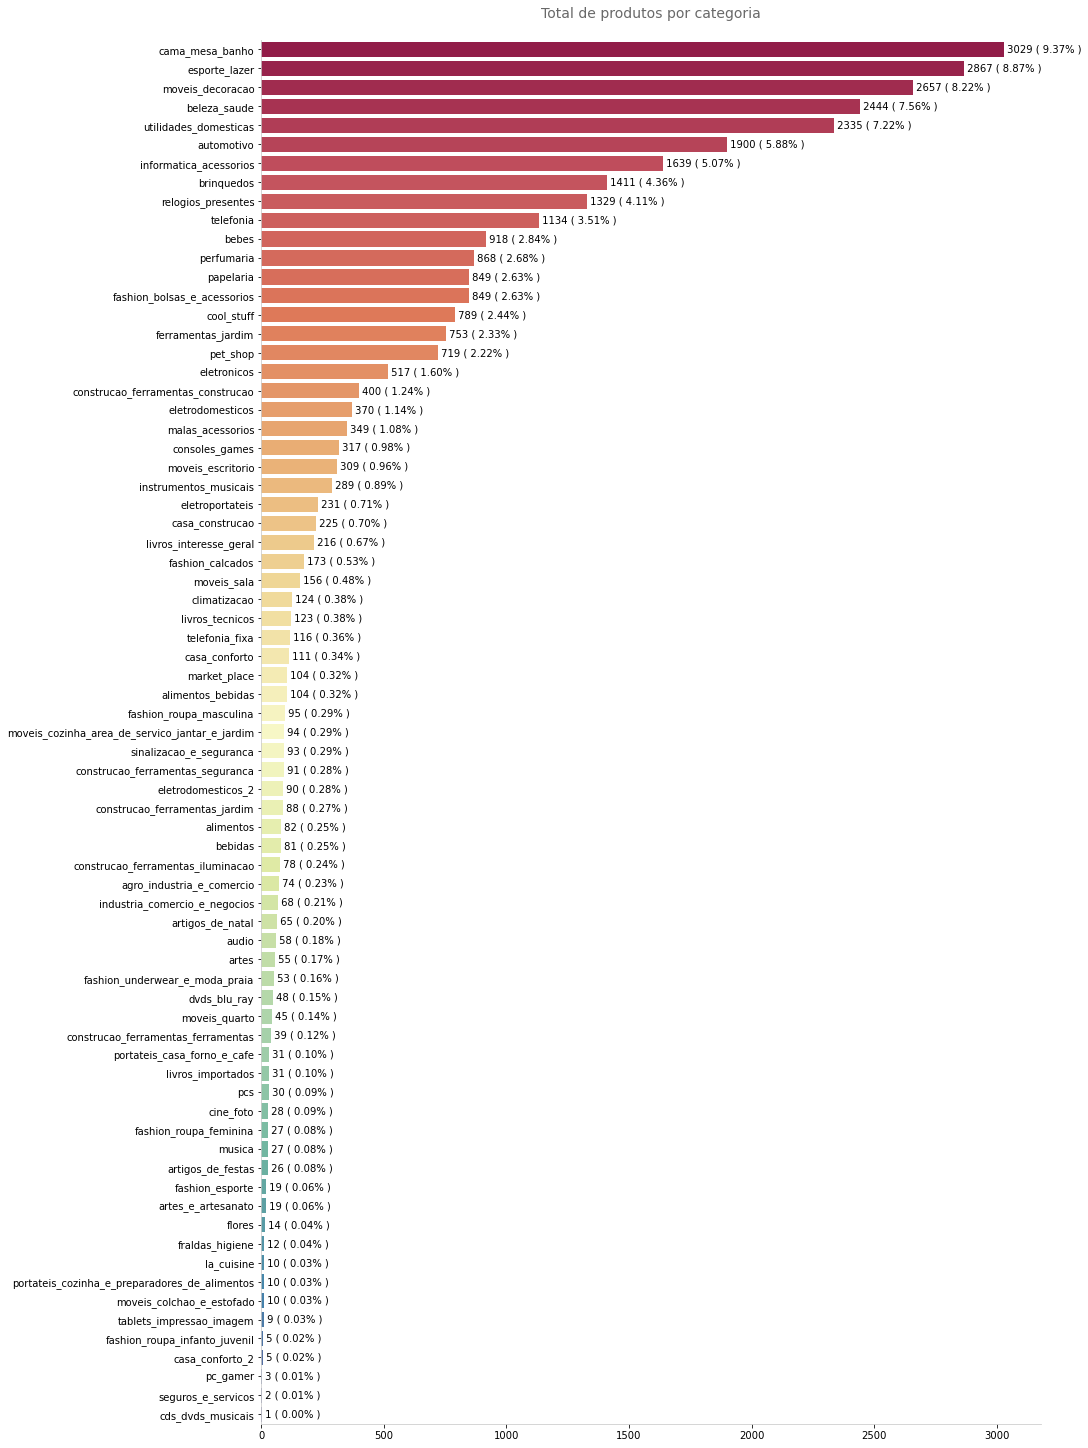

In [88]:
## Total de pagamentos por tipo de pagamento
fig = plt.figure(constrained_layout=True, figsize=(15, 20))
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

bar_count_plot(df_products, 
               y='product_category_name', 
               order=True,
               palette='Spectral',
               ax=ax1,
               title='Total de produtos por categoria')
ax1.set_ylabel('')
ax1.set_xlabel('')
plt.show()

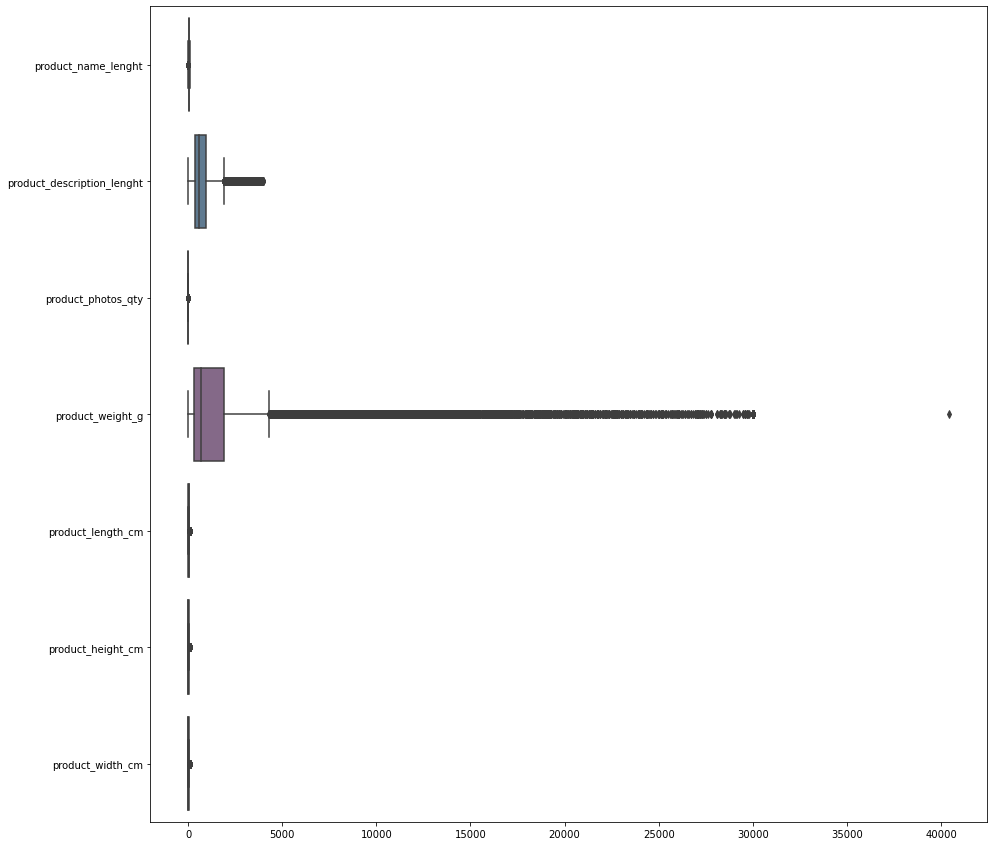

In [89]:
## Tamanho da figura
plt.figure(figsize = (15,15))

## Paleta de cores
sns_my_palete_01 = sns.color_palette('Set1', 
                                     n_colors = 8,
                                     desat = 0.5)

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_products[["product_name_lenght", "product_description_lenght", "product_photos_qty", 
                                     "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]],
                 orient='h',
                 palette = sns_my_palete_01 )

## Exibir gráfico
plt.show()

<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

É possível identificar outiliers nesses dados, mas todos eles fazem sentido, por que a loja tem uma variedade imensa de produtos, desde canetas até geladeiras.

<a id = '516'></a>
<h5>5.1.6. Dataset df_sellers </h5>

In [90]:
## Primeiros 5 Registros
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [91]:
## Verificando se há valores duplicados
duplicateRows = df_sellers[df_sellers.duplicated(['seller_id'])]
duplicateRows

,seller_id,seller_zip_code_prefix,seller_city,seller_state


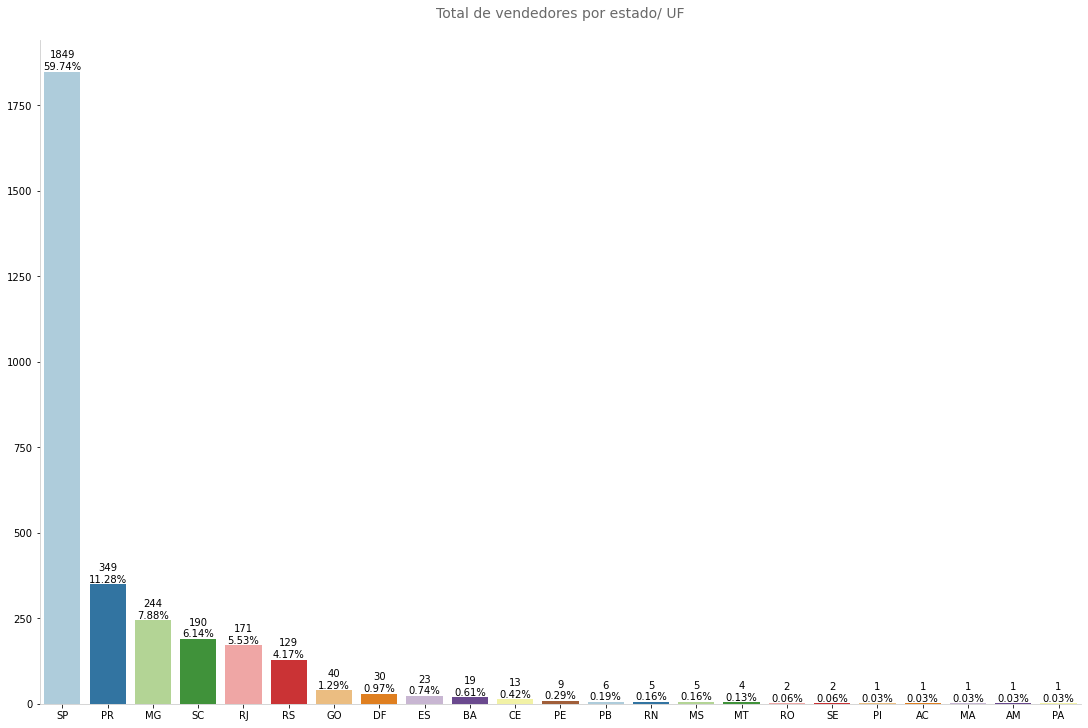

In [92]:
## Total de Clientes por Estado
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

bar_count_plot(df_sellers, 
               x='seller_state', 
               order=True,
               ax=ax1,
               palette='Paired',
               title='Total de vendedores por estado/ UF')
ax1.set_ylabel('')
ax1.set_xlabel('')
plt.show()

<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

Cerca de **89%** dos vendedores são das regiões Sul e Sudeste

<a id ='52'></a>
<h4>5.2. Junções/ Joins de bases</h4>

Antes de realizar o JOIN é preciso ajustar alguns datasets que possuem _"códigos duplicados"_ onde será feito um agrupamento e aplicação de pivot. Assim teremos tabelas com valores unicos e agrupados onde for necessário

<a id = '521'></a>
<h5>5.2.1. Dataset df_order_payments </h5>

In [93]:
## Analisando os 5 primeiros registros
df_order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,only_1_payment,payment_sequential_categ
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,True,apenas_1
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,True,apenas_1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,True,apenas_1
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,True,apenas_1
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,True,apenas_1


In [94]:
## Realizando o pivoteamento
df_order_payment_adjusted = pd.pivot_table(df_order_payments, index=["order_id"], 
                                           columns=["payment_type"], 
                                           values=["payment_value"],
                                           aggfunc=np.sum, 
                                           fill_value=0) \
                              .reset_index() \
                              .droplevel(0, axis=1) 

## Renomeando as colunas
df_order_payment_adjusted = df_order_payment_adjusted.rename(columns={'': 'order_id', 
                                                                      'boleto': 'payment_type_boleto',
                                                                      'credit_card': 'payment_type_credit_card',
                                                                      'debit_card': 'payment_type_debit_card',
                                                                      'not_defined': 'payment_type_not_defined',
                                                                      'voucher': 'payment_type_voucher',})

## Incluindo as colunas anteriores
df_aux = df_order_payments.groupby(['order_id']).agg({'payment_installments': 'max', 'payment_sequential': 'max'}).reset_index()
df_order_payment_adjusted = df_order_payment_adjusted.merge(df_aux, on='order_id',how='inner')

## Estabelecer condicoes para as categorias
conditions = [(df_order_payment_adjusted['payment_sequential'] == 1), 
              (df_order_payment_adjusted['payment_sequential'] <= 5), 
              (df_order_payment_adjusted['payment_sequential'] <= 10), 
              (df_order_payment_adjusted['payment_sequential'] <= 20),
              (df_order_payment_adjusted['payment_sequential'] <= 30)]
## Nome das categorias
choices     = [ "apenas_1", "menor_igual_5", 'menor_igual_10', 'menor_igual_20', 'menor_igual_30']
## Coluna com as categorias
df_order_payment_adjusted["payment_sequential_categ"] = np.select(conditions, choices, default=np.nan)

In [95]:
## Analisando os 5 primeiros registros
df_order_payment_adjusted.head(5)

,order_id,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,payment_installments,payment_sequential,payment_sequential_categ
0,00010242fe8c5a6d1ba2dd792cb16214,0.0,72.19,0.0,0,0.0,2,1,apenas_1
1,00018f77f2f0320c557190d7a144bdd3,0.0,259.83,0.0,0,0.0,3,1,apenas_1
2,000229ec398224ef6ca0657da4fc703e,0.0,216.87,0.0,0,0.0,5,1,apenas_1
3,00024acbcdf0a6daa1e931b038114c75,0.0,25.78,0.0,0,0.0,2,1,apenas_1
4,00042b26cf59d7ce69dfabb4e55b4fd9,0.0,218.04,0.0,0,0.0,3,1,apenas_1


<a id = '522'></a>
<h5>5.2.1. Dataset df_order_items </h5>

In [96]:
## Analisando os 5 primeiros registros
df_order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [97]:
## Realizando o agrupamento
df_order_items_adjusted = df_order_items.groupby(['order_id']).agg({'order_item_id': 'max', 
                                                                    'product_id': 'nunique',
                                                                    'seller_id': 'nunique',
                                                                    'price': 'sum',
                                                                    'freight_value': 'sum'}) \
                                                              .reset_index()

## Renomeando as colunas
df_order_items_adjusted = df_order_items_adjusted.rename(columns={'order_item_id': 'count_order_item_id',
                                                                  'product_id': 'count_product_id',
                                                                  'seller_id': 'count_seller_id',
                                                                  'price': 'total_price',
                                                                  'freight_value': 'total_freight_value',})

In [98]:
## Analisando os 5 primeiros registros
df_order_items_adjusted.head(5)

,order_id,count_order_item_id,count_product_id,count_seller_id,total_price,total_freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,1,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,1,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,1,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,199.90,18.14


Ajustes concluídos copm sucesso, com isso podemos fazer o join dos datasets e realizar análises multivariadas, e ao mesmo tempo inputar os dados ao modelo.

<a id = '523'></a>
<h5>5.2.3. Criando ABT (Analytical Base Table)</h5>

<p style="font-size: 2rem; color: #F08080">NOTA !!!</p>

Nas análises feitas até aqui, foram identificadas bases de dados que nesse primeiro momento não fazem sentido estar na análise e nos modelos, portanto trabalharemos apenas com as bases relacionadas a **pedido/ orders**, **cliente/ customers**, **item de pedido/ order items** e **pagamento/ payments**

In [99]:
## Realizando join
df_data = df_customers.merge(df_orders, on='customer_id',how='inner') \
                      .merge(df_order_payment_adjusted, on='order_id',how='inner') \
                      .merge(df_order_items_adjusted, on='order_id',how='inner') 

In [100]:
## Removendo colunas desnecessárias
df_data = df_data.drop(['customer_zip_code_prefix'], axis=1)

## Criando coluna com todos os pagamentos
df_data["total_payment"] = df_data["payment_type_boleto"] \
                            + df_data["payment_type_credit_card"] \
                            + df_data["payment_type_debit_card"] \
                            + df_data["payment_type_not_defined"] \
                            + df_data["payment_type_voucher"]

In [101]:
## Primeiros registros
df_data.head(3)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_hours_purchase_approved,diff_hours_carries_purchase,diff_hours_customer_carrier,diff_days_customer_purchase,diff_days_customer_estimated,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,payment_installments,payment_sequential,payment_sequential_categ,count_order_item_id,count_product_id,count_seller_id,total_price,total_freight_value,total_payment
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,0.276944,163.706111,47.793889,8.812500,10.558623,0.0,146.87,0.0,0,0.0,2,1,apenas_1,1,1,1,124.99,21.88,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,0.168889,68.443056,331.438889,16.661748,7.471308,0.0,335.48,0.0,0,0.0,8,1,apenas_1,1,1,1,289.00,46.48,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,24.190278,550.387500,75.464167,26.077153,-1.749201,0.0,157.73,0.0,0,0.0,7,1,apenas_1,1,1,1,139.94,17.79,157.73


<a id ='53'></a>
<h4>5.3. Análise dos dados qualitativos</h4>

<a id ='531'></a>
<h5>5.3.1 Distribuição de Frequência</h5>

In [102]:
## Distribuição de frequência
frequency_distribution(df_data, 'customer_state')

,Frequencia Absoluta,Frequencia Relativa
customer_state,,
SP,40422,41.987286
RJ,12331,12.808501
MG,11325,11.763545
RS,5325,5.531203
PR,4912,5.102210
...,...,...
RO,243,0.252410
AM,145,0.150615
AC,80,0.083098


In [103]:
## Distribuição de frequência
frequency_distribution(df_data, 'customer_city').head(5)

,Frequencia Absoluta,Frequencia Relativa
customer_city,,
sao paulo,15019,15.600590
rio de janeiro,6594,6.849344
belo horizonte,2687,2.791050
brasilia,2068,2.148080
curitiba,1486,1.543543


In [104]:
## Distribuição de frequência
frequency_distribution(df_data, 'order_status').head(5)

,Frequencia Absoluta,Frequencia Relativa
order_status,,
delivered,96266,99.993768
canceled,6,0.006232


In [105]:
## Distribuição de frequência
frequency_distribution(df_data, 'payment_sequential_categ').head(5)

,Frequencia Absoluta,Frequencia Relativa
payment_sequential_categ,,
apenas_1,93325,96.938882
menor_igual_5,2836,2.945820
menor_igual_10,83,0.086214
menor_igual_20,25,0.025968
menor_igual_30,3,0.003116


<a id ='54'></a>
<h4>5.4. Análise dos dados quantitativos</h4>

<a id ='541'></a>
<h5>5.4.1 Boxplot Geral</h5>

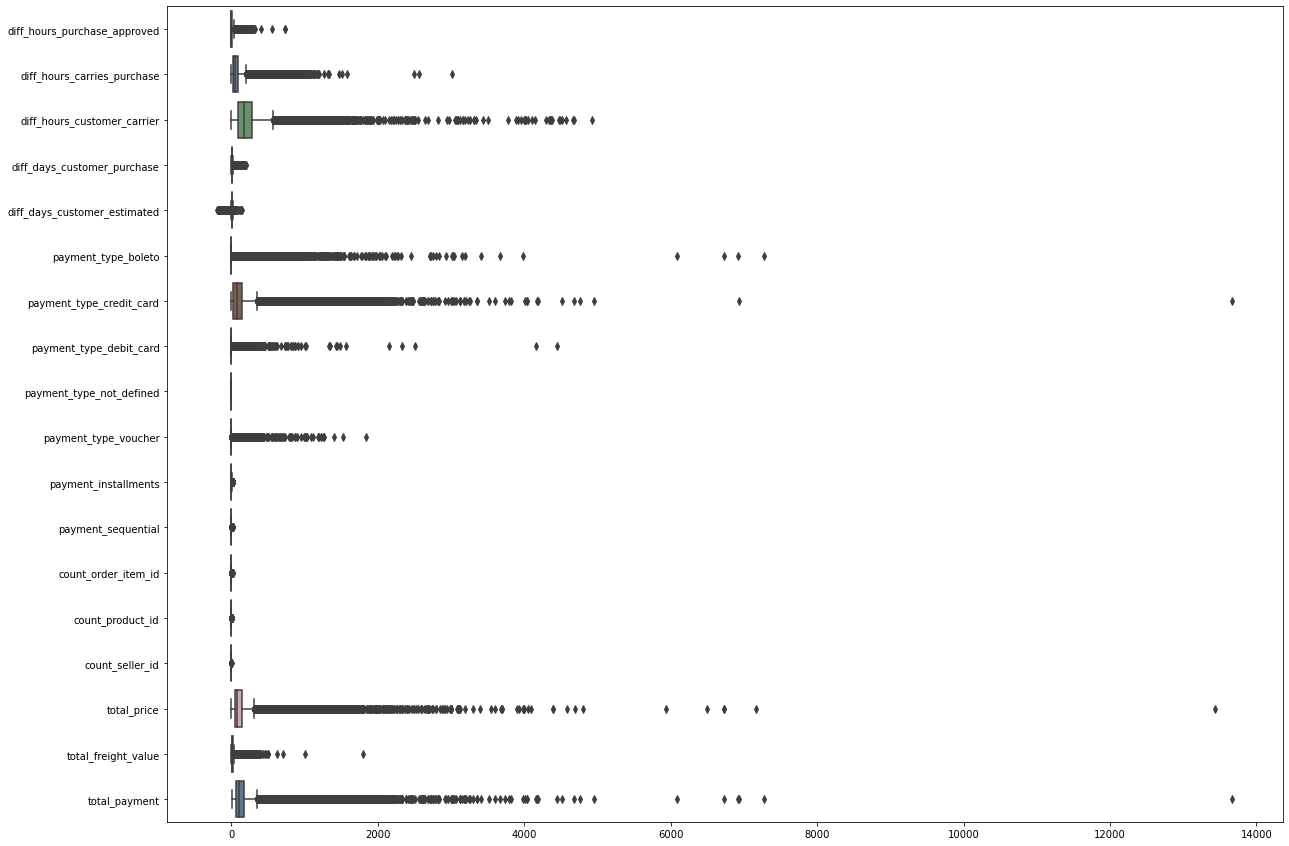

In [106]:
## Tamanho da figura
plt.figure(figsize = (20,15))

## Paleta de cores
sns_my_palete_01 = sns.color_palette('Set1', 
                                     n_colors = 8,
                                     desat = 0.5)

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_data,
                 palette = sns_my_palete_01,
                 orient='h')

## Exibir gráfico
plt.show()

<a id ='542'></a>
<h5>5.4.2 Analisando variáveis numéricas</h5>

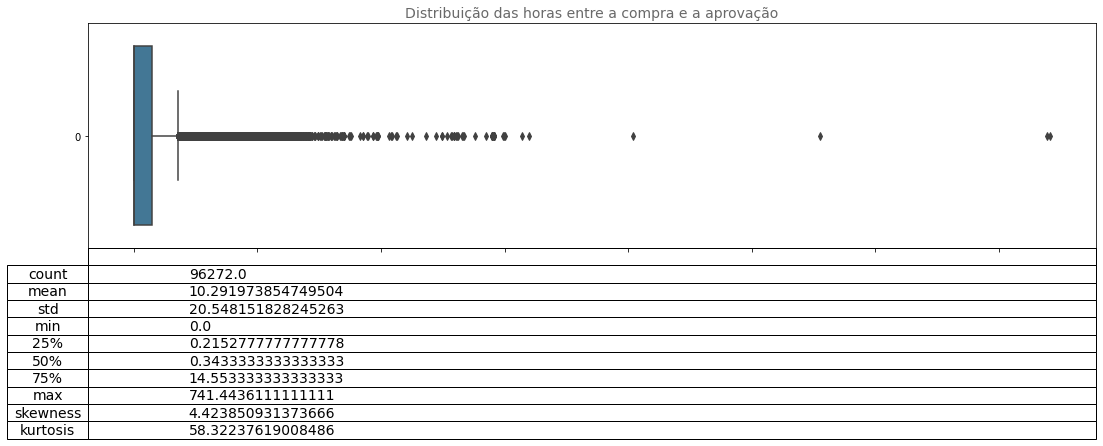

In [107]:
# Chamando a funcao para fazer a plotagem
col = 'diff_hours_purchase_approved'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição das horas entre a compra e a aprovação', palette='mako')

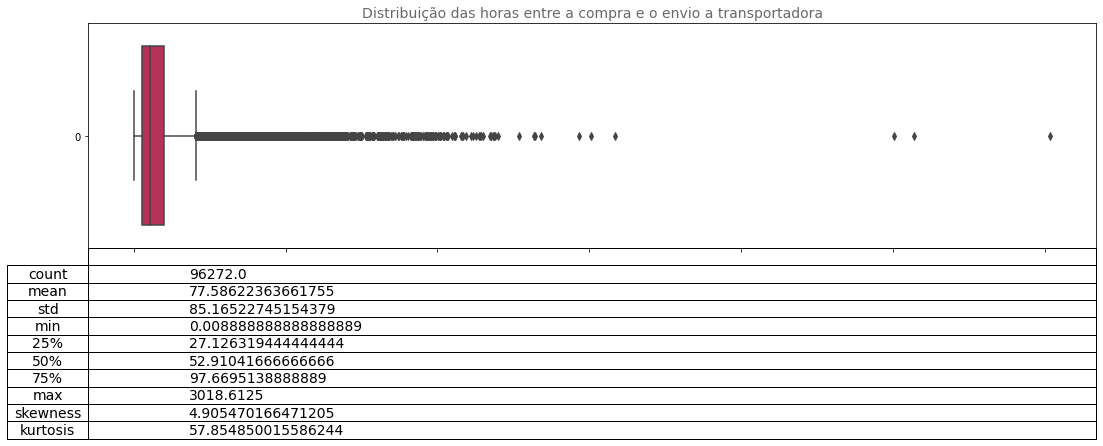

In [108]:
# Chamando a funcao para fazer a plotagem
col = 'diff_hours_carries_purchase'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição das horas entre a compra e o envio a transportadora', palette='rocket')

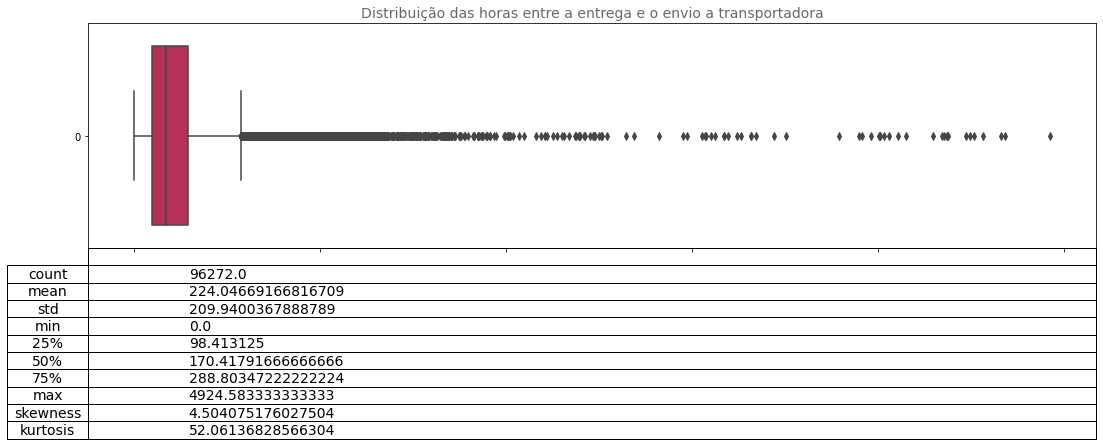

In [109]:
# Chamando a funcao para fazer a plotagem
col = 'diff_hours_customer_carrier'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição das horas entre a entrega e o envio a transportadora', palette='rocket')

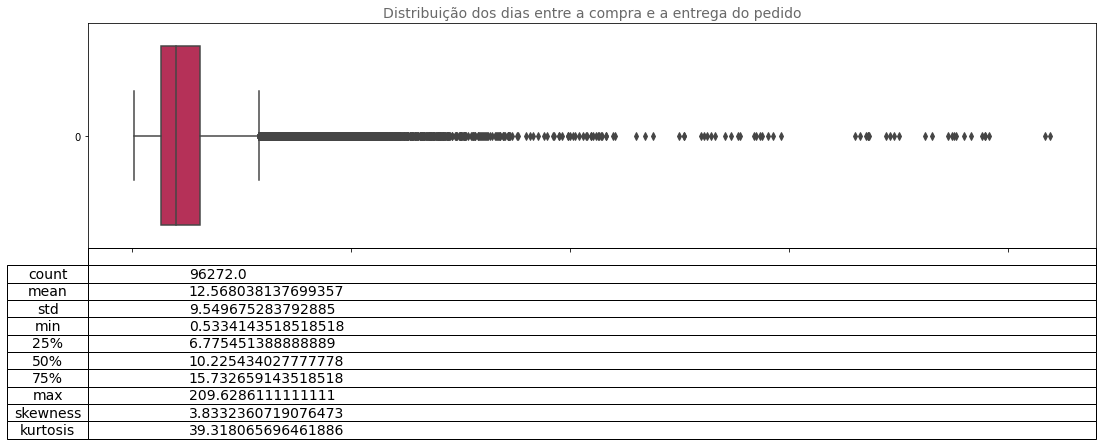

In [110]:
# Chamando a funcao para fazer a plotagem
col = 'diff_days_customer_purchase'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos dias entre a compra e a entrega do pedido', palette='rocket')

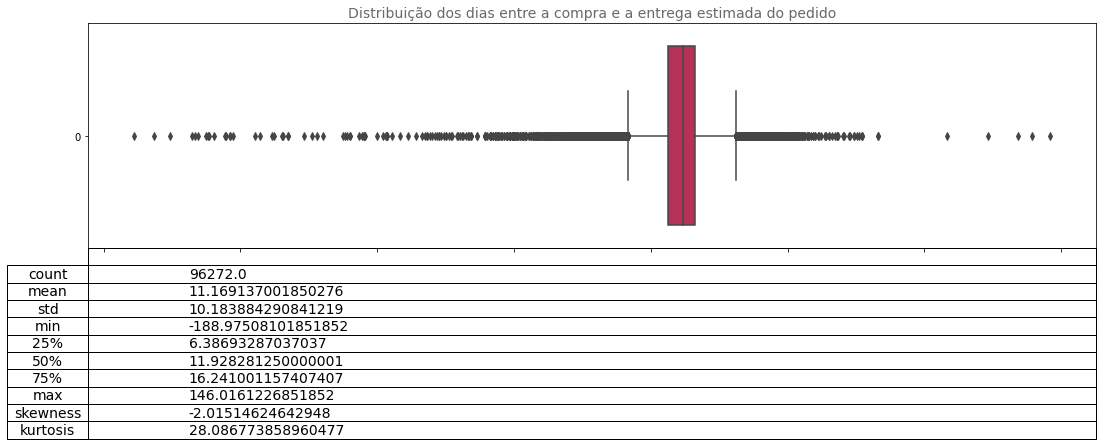

In [111]:
# Chamando a funcao para fazer a plotagem
col = 'diff_days_customer_estimated'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos dias entre a compra e a entrega estimada do pedido', palette='rocket')

A diferença de dias e horas entre as muitas datas existentes no _dataset_ não obedece uma distribuição normal, além de apresentar muitos outliers. Contudo esses outliers fazem sentido para o negócio.

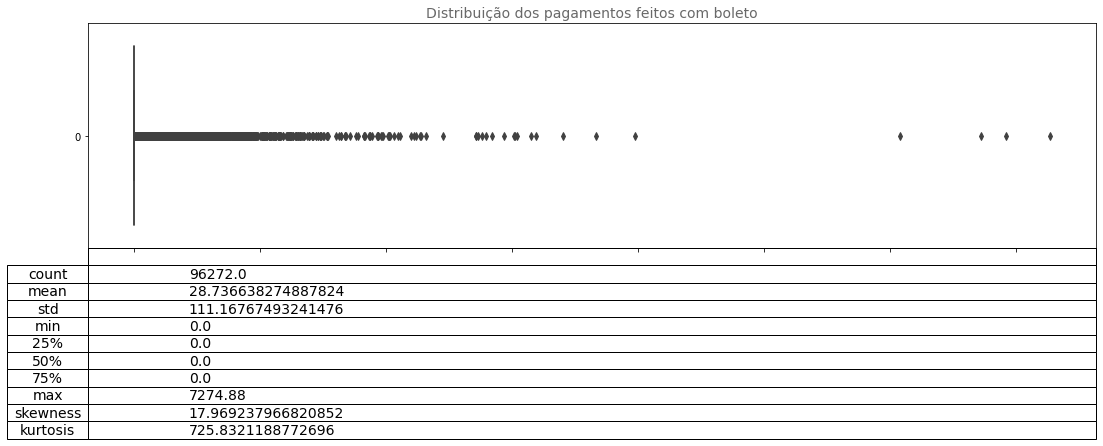

In [112]:
# Chamando a funcao para fazer a plotagem
col = 'payment_type_boleto'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos pagamentos feitos com boleto', palette='mako')

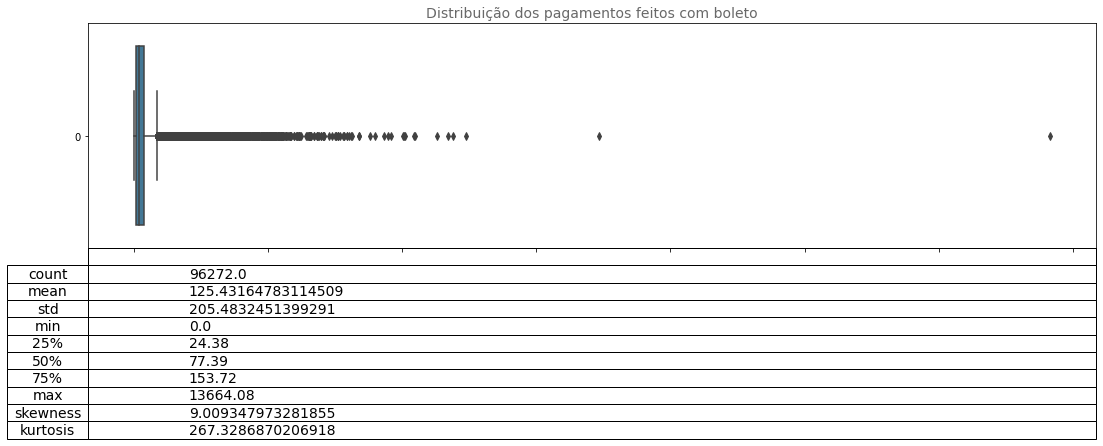

In [113]:
# Chamando a funcao para fazer a plotagem
col = 'payment_type_credit_card'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos pagamentos feitos com boleto', palette='mako')

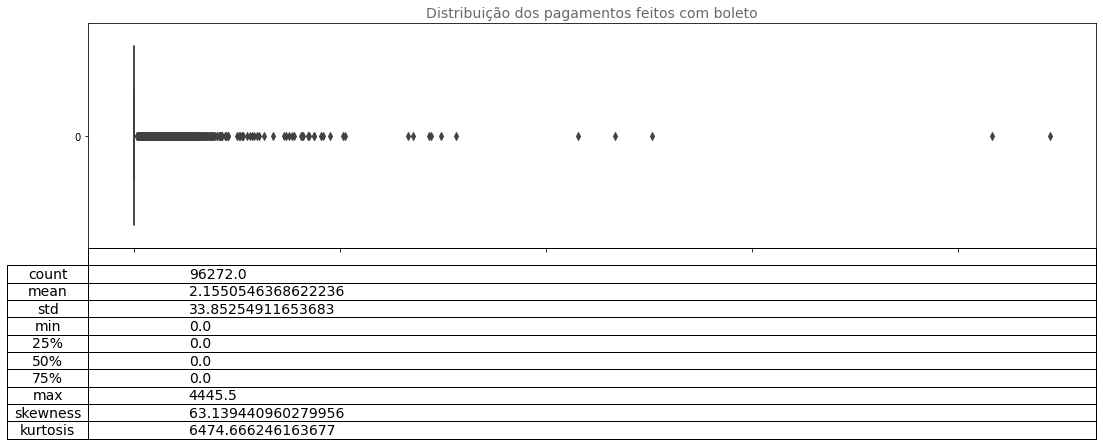

In [114]:
# Chamando a funcao para fazer a plotagem
col = 'payment_type_debit_card'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos pagamentos feitos com boleto', palette='mako')

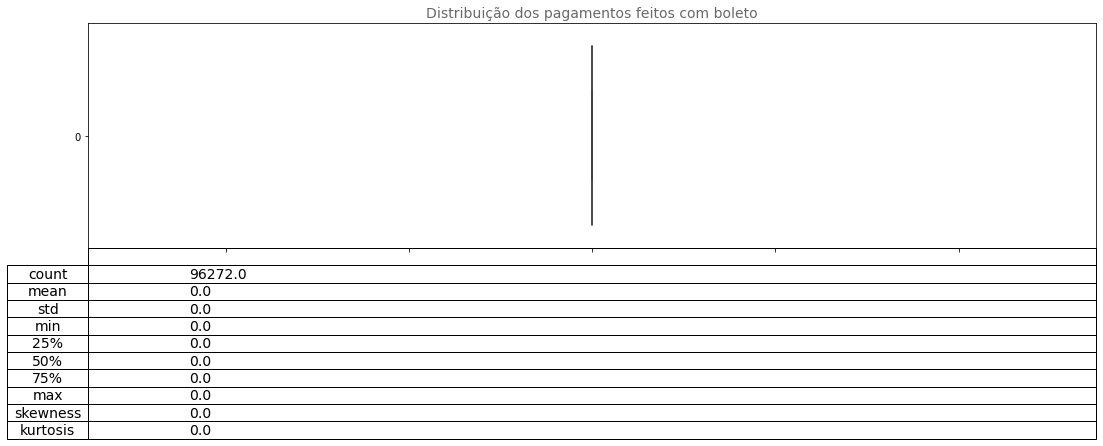

In [115]:
# Chamando a funcao para fazer a plotagem
col = 'payment_type_not_defined'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos pagamentos feitos com boleto', palette='mako')

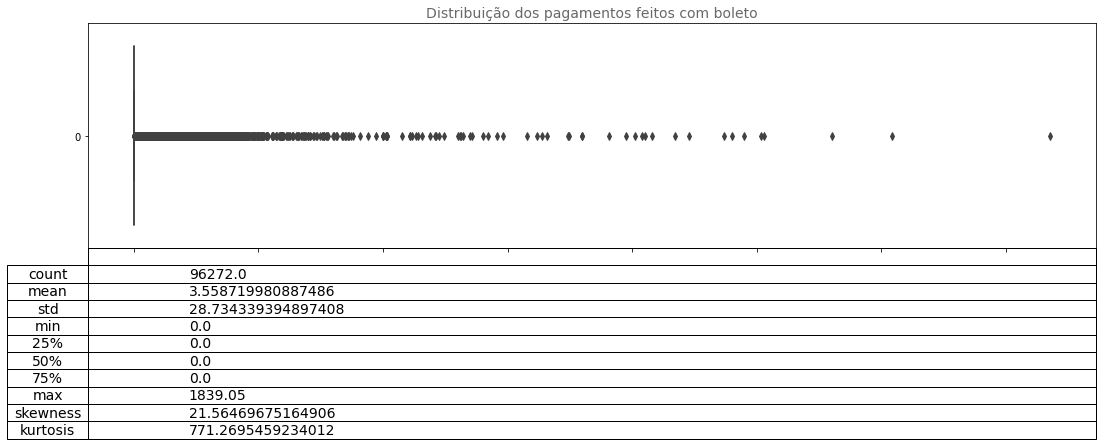

In [116]:
# Chamando a funcao para fazer a plotagem
col = 'payment_type_voucher'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos pagamentos feitos com boleto', palette='mako')

Também foram identificados outliers nos dados de pagamento, que mais uma vez fazem sentido. Há compra que são feitas em diversos metódos, e aquelas que são feitas em apenas um, isso explica muitos dos dados apresentados

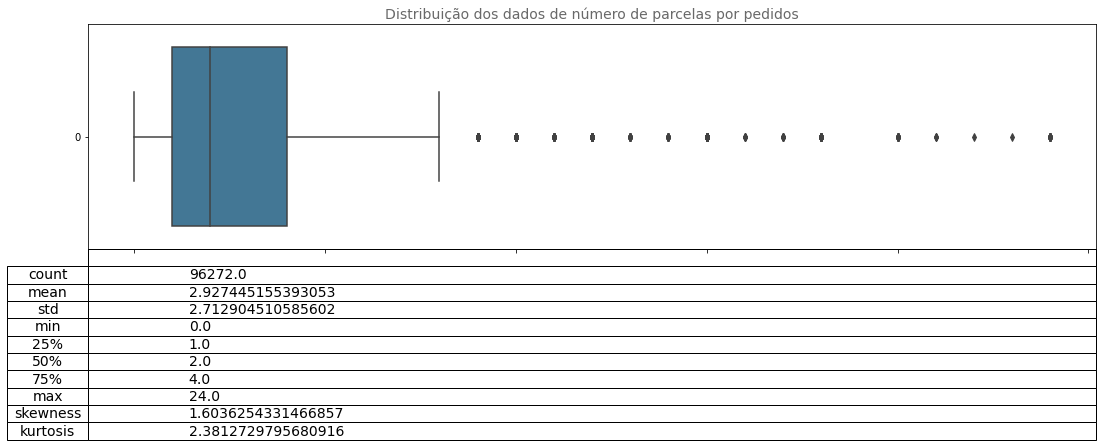

In [117]:
# Chamando a funcao para fazer a plotagem
col = 'payment_installments'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos dados de número de parcelas por pedidos', palette='mako')

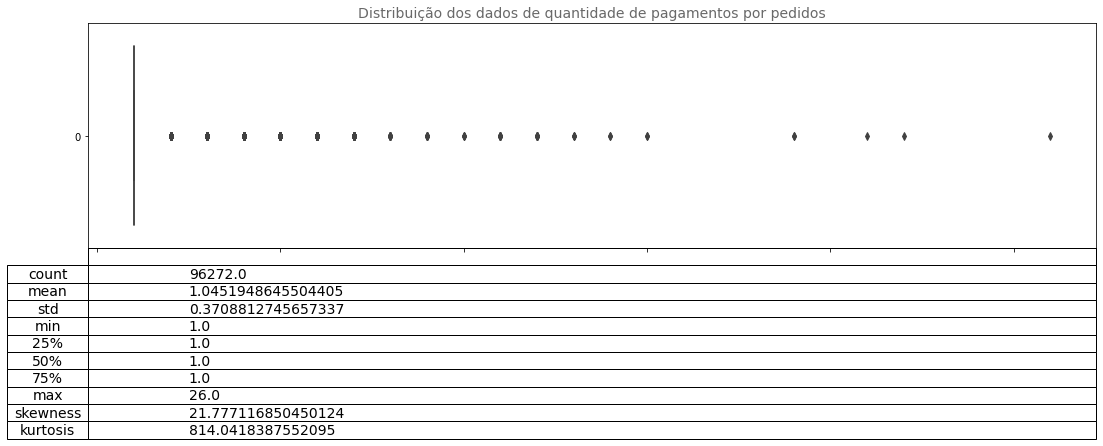

In [118]:
# Chamando a funcao para fazer a plotagem
col = 'payment_sequential'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos dados de quantidade de pagamentos por pedidos', palette='mako')

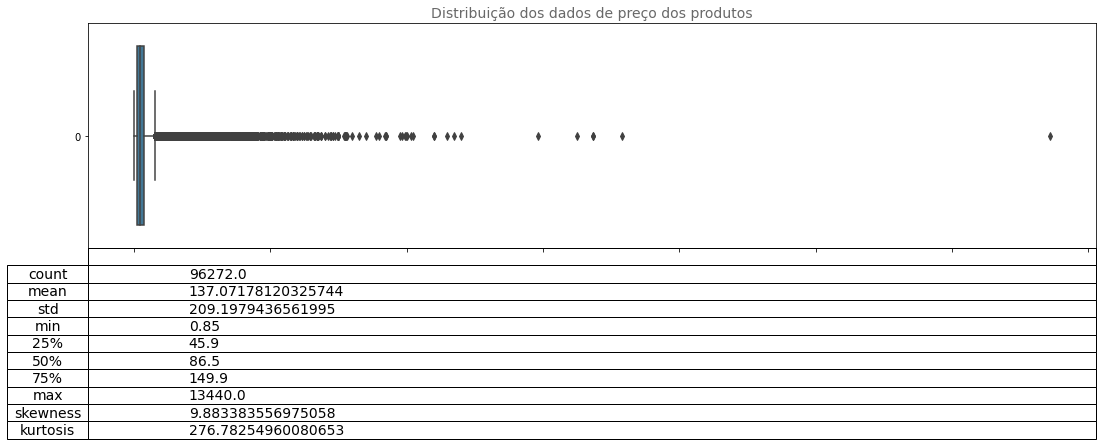

In [119]:
# Chamando a funcao para fazer a plotagem
col = 'total_price'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos dados de preço dos produtos', palette='mako')

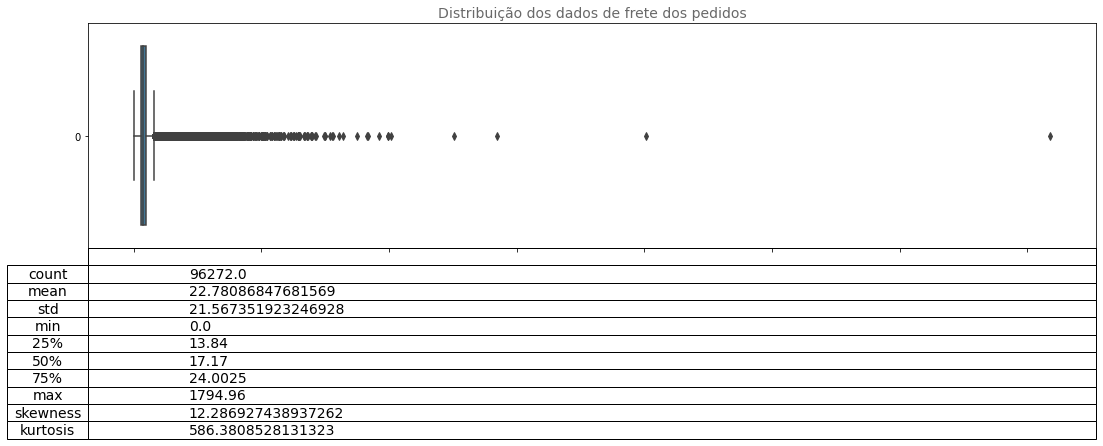

In [120]:
# Chamando a funcao para fazer a plotagem
col = 'total_freight_value'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos dados de frete dos pedidos', palette='mako')

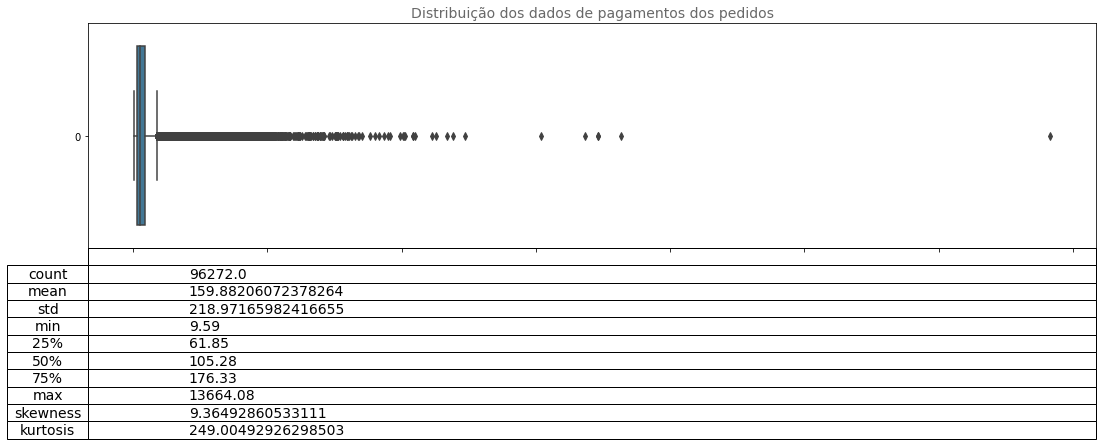

In [121]:
# Chamando a funcao para fazer a plotagem
col = 'total_payment'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos dados de pagamentos dos pedidos', palette='mako')

Analisando os dados de pagamento, frete e preço dos produtos é possível identificar outliers contudo eles fazem sentido, dado que a loja vende produtos de inúmeros valores, desde canetas até geladeiras.

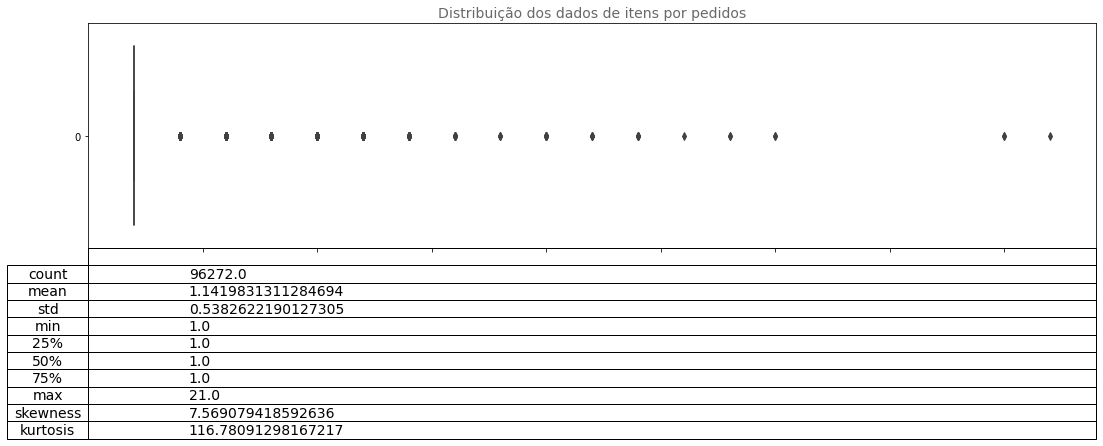

In [122]:
# Chamando a funcao para fazer a plotagem
col = 'count_order_item_id'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos dados de itens por pedidos', palette='mako')

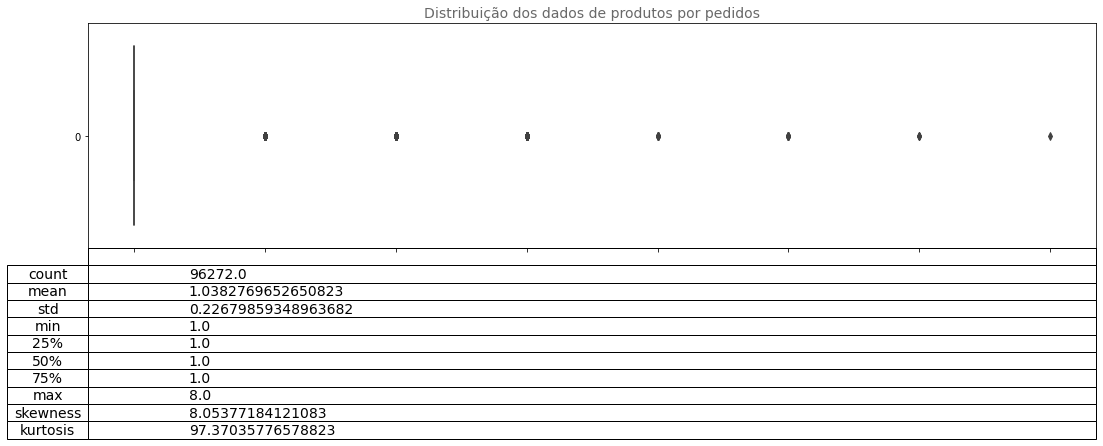

In [123]:
# Chamando a funcao para fazer a plotagem
col = 'count_product_id'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição dos dados de produtos por pedidos', palette='mako')

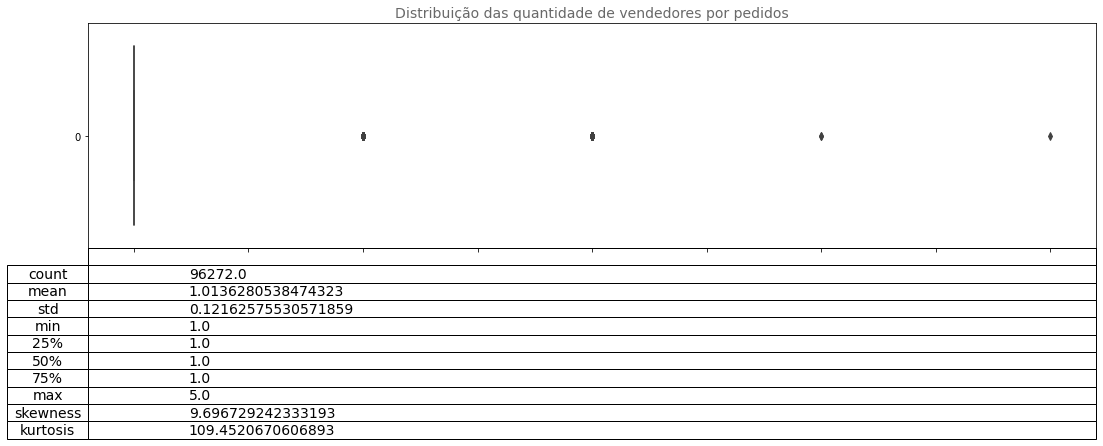

In [124]:
# Chamando a funcao para fazer a plotagem
col = 'count_seller_id'
fig, ax = plt.subplots(figsize=(20, 4))
boxplot(df_data, column=col, ax=ax, title='Distribuição das quantidade de vendedores por pedidos', palette='mako')

<a id ='543'></a>
<h5>5.4.3 Correlação dos dados</h5>

In [125]:
# Verificando a correlacao das variaveis
df_corr = df_data.drop(['payment_type_not_defined'], axis=1).corr()

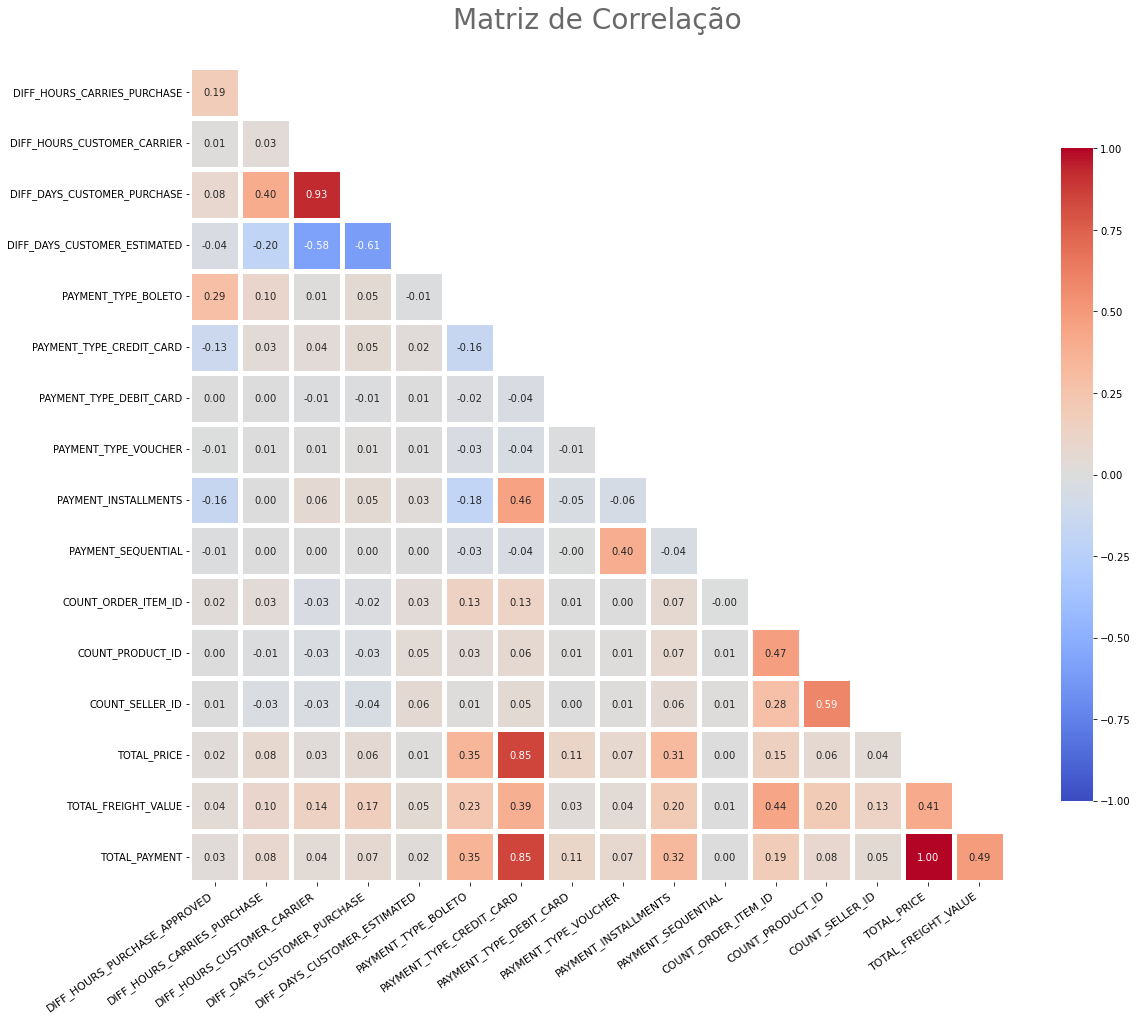

In [126]:
fig, ax = plt.subplots(figsize=(20, 15))

heatmap_plot(df_corr=df_corr, ax=ax, title="Matriz de Correlação", title_size=28)

<a id ='53'></a>
<h4>5.5. Analise geral dos dado (Captando alguns insights)</h4>

<a id ='551'></a>
<h5>5.5.1 Pedidos e Pagamentos</h5>

In [127]:
## Realizando o agrupamento por data
df_aux = df_data.groupby([df_data.order_purchase_timestamp.dt.to_period('M')]).agg({'order_id': 'nunique', 
                                                                                    'customer_unique_id': 'nunique',
                                                                                    'total_price': 'sum',
                                                                                    'total_freight_value': 'sum'}) \
                                                      .reset_index()

df_aux["ticket_medio"] = df_aux["total_price"] / df_aux["order_id"]
df_aux["frete_medio"] = df_aux["total_freight_value"] / df_aux["order_id"]

In [128]:
## Visualizando os primeiros registros
df_aux.head(3)

,order_purchase_timestamp,order_id,customer_unique_id,total_price,total_freight_value,ticket_medio,frete_medio
0,2016-10,266,263,40354.36,6181.95,151.708120,23.240414
1,2016-12,1,1,10.90,8.72,10.900000,8.720000
2,2017-01,747,716,111523.82,15636.97,149.295609,20.933025


In [129]:
print("Menor data pedido: ", df_data["order_purchase_timestamp"].min(), "\nMaior data pedido: ", df_data["order_purchase_timestamp"].max())

Menor data pedido:  2016-10-03 09:44:50 
Maior data pedido:  2018-08-29 15:00:37


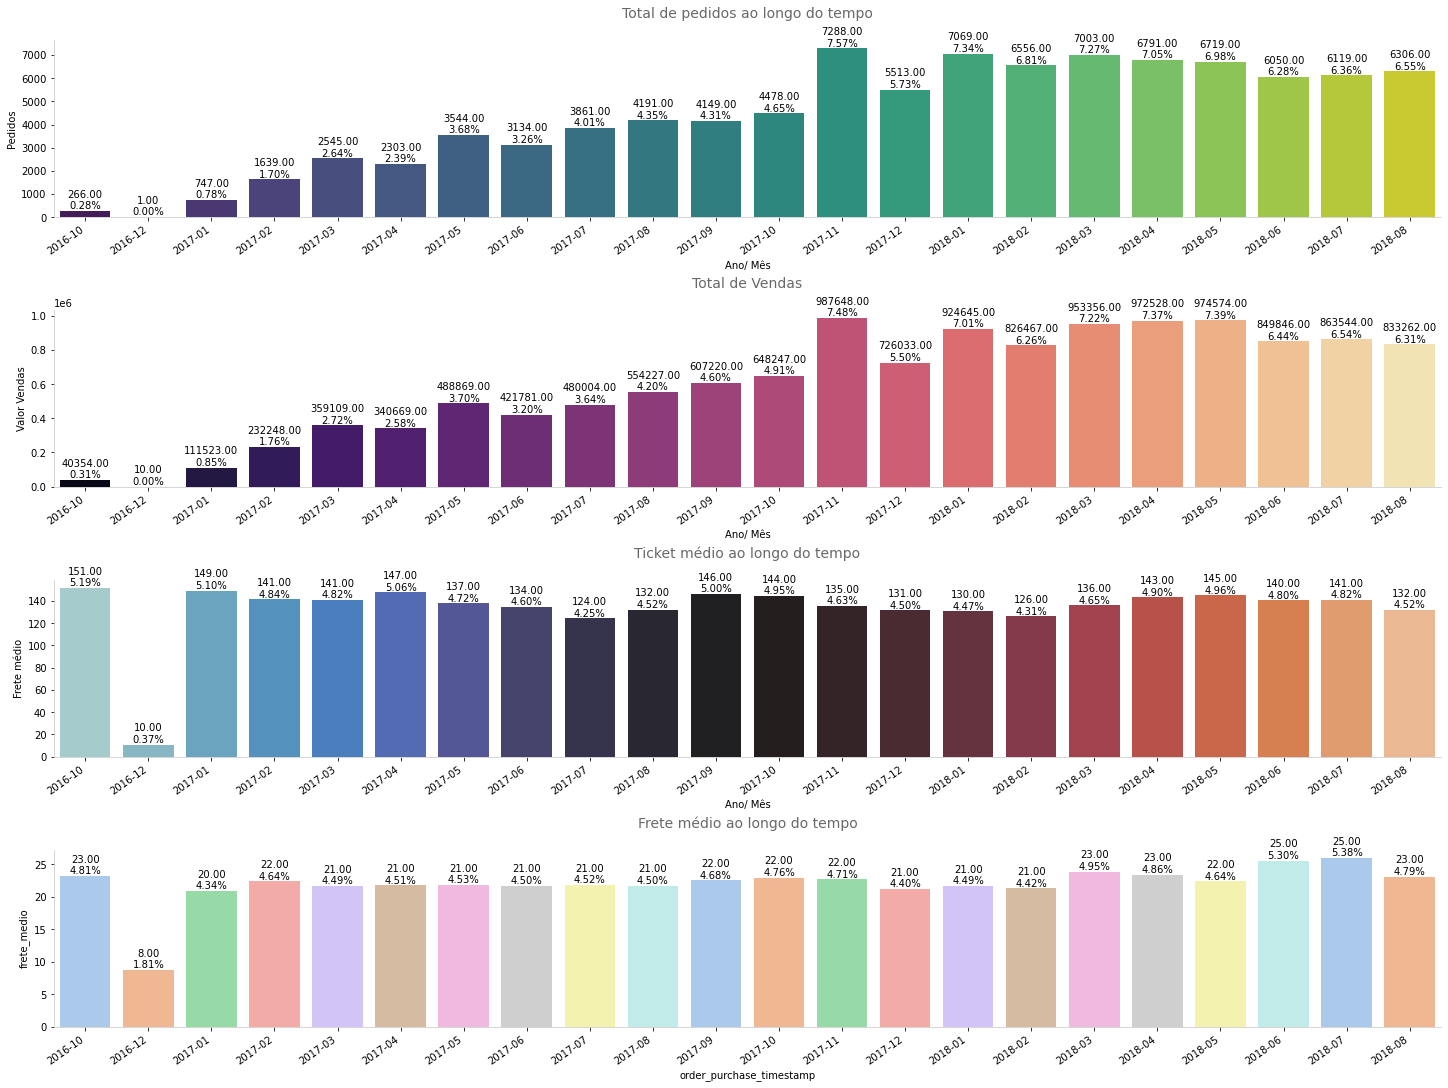

In [130]:
fig = plt.figure(constrained_layout=True, figsize=(20, 15))
gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])
ax4 = fig.add_subplot(gs[3, :])

## Gráfico 1
bar_plot(df_aux, 
               x='order_purchase_timestamp', 
               y="order_id",
               ax=ax1,
               palette='viridis',
               title='Total de pedidos ao longo do tempo')
ax1.set_ylabel('Pedidos')
ax1.set_xlabel('Ano/ Mês')

## Gráfico 2
## Total de Clientes por Estado
bar_plot(df_aux, 
               x='order_purchase_timestamp', 
               y="total_price",
               ax=ax2,
               palette='magma',
               title='Total de Vendas')
ax2.set_ylabel('Valor Vendas')
ax2.set_xlabel('Ano/ Mês')

## Gráfico 3
bar_plot(df_aux, 
               x='order_purchase_timestamp', 
               y="ticket_medio",
               ax=ax3,
               palette='icefire',
               title='Ticket médio ao longo do tempo')
ax3.set_ylabel('Ticket médio')
ax3.set_xlabel('Ano/ Mês')

## Gráfico 4
bar_plot(df_aux, 
               x='order_purchase_timestamp', 
               y="frete_medio",
               ax=ax4,
               palette='pastel',
               title='Frete médio ao longo do tempo')
ax3.set_ylabel('Frete médio')
ax3.set_xlabel('Ano/ Mês')


plt.show()

Observando os dados de pedidos que faz sentido aplicar um filtro de data entre **01/01/2017** e **31/08/2018**. Assim é possível fazer um comparativo da evolução das vendas nos meses de cada ano.

In [131]:
## Aplicando filtro
df_data_filter = df_data.loc[(df_data['order_purchase_timestamp'] >= '2017-01-01') & (df_data['order_purchase_timestamp'] < '2018-09-01')]

In [132]:
## Extraindo Ano
df_data_filter['order_purchase_year'] = df_data_filter['order_purchase_timestamp'].dt.year
## Extraindo mês
df_data_filter['order_purchase_month'] = df_data_filter['order_purchase_timestamp'].dt.month
## Extraindo nome do mês
df_data_filter['order_purchase_month_name'] = pd.to_datetime(df_data_filter['order_purchase_timestamp']).dt.strftime('%B')
## Coluna Ano mes
df_data_filter['order_purchase_year_month'] = df_data_filter['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))

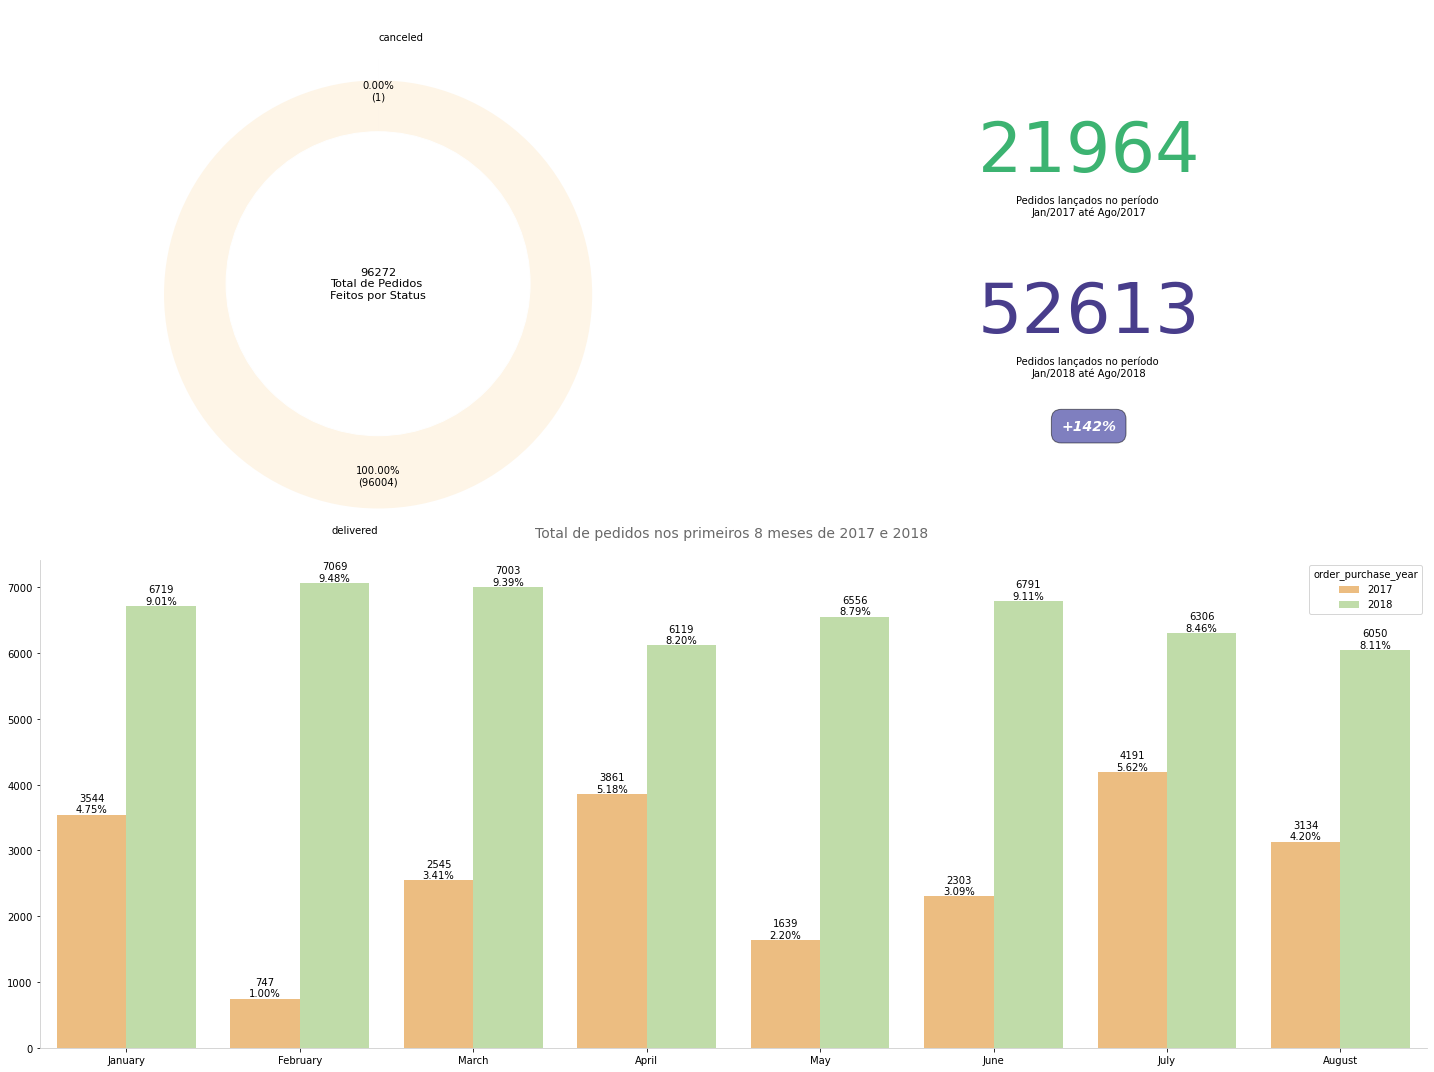

In [133]:
fig = plt.figure(constrained_layout=True, figsize=(20, 15))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

## Gráfico 1
colors = ['#FEF5E7','#F4ECF7' , '#EBEDEF']
label_names = df_data_filter['order_status'].value_counts().index
pie_plot(df_data_filter, 
         col='order_status', 
         ax=ax1, 
         label_names=label_names, 
         colors=colors,
         circle_radius=0.71,
         title='', 
         text=f'{len(df_data)}\nTotal de Pedidos \nFeitos por Status')

## Gráfico 2
year_orders = df_data_filter.loc[(df_data_filter['order_purchase_month'] <= 8)]['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
ax2.text(0.50, 0.73, f'{year_orders[2017]}', fontsize=70, color='mediumseagreen', ha='center')
ax2.text(0.50, 0.64, 'Pedidos lançados no período \nJan/2017 até Ago/2017', fontsize=10, ha='center')
ax2.text(0.50, 0.40, f'{year_orders[2018]}', fontsize=70, color='darkslateblue', ha='center')
ax2.text(0.50, 0.31, 'Pedidos lançados no período \nJan/2018 até Ago/2018', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax2.text(0.50, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax2.axis('off')

## Gráfico 3
df_aux2 = df_data_filter.loc[(df_data_filter['order_purchase_month'] <= 8)]
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
bar_count_plot(df_aux2, 
               x='order_purchase_month_name', 
               ax=ax3,
               hue='order_purchase_year',
               palette='Spectral',
               title='Total de pedidos nos primeiros 8 meses de 2017 e 2018 ')
ax3.set_xticklabels(month_label)
ax3.set_ylabel('')
ax3.set_xlabel('')
plt.show()


A seguir veremos os dados de pedido, faturamento e frete obtidos ao longo do período

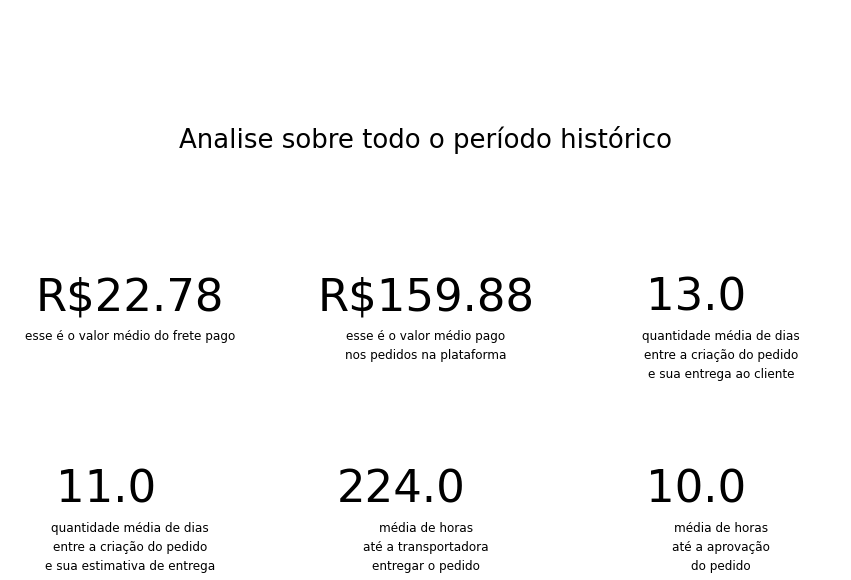

In [134]:
## Objetos referentes as figuras
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Titulo
axs[0, 1].text(0.50, 0.12, 'Analise sobre todo o período histórico', fontsize=26, ha='center')
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[0, 2].axis('off')

## Cards
# Frete
axs[1, 0].text(0.50, 0.30, f'R${round(df_data["total_freight_value"].mean(), 2)}', fontsize=45, ha='center')
axs[1, 0].text(0.50, 0.12, 'esse é o valor médio do frete pago', fontsize=12, ha='center')
axs[1, 0].axis('off')

# Compra
axs[1, 1].text(0.50, 0.30, f'R${round(df_data["total_payment"].mean(), 2)}', fontsize=45, ha='center')
axs[1, 1].text(0.50, 0.12, 'esse é o valor médio pago', fontsize=12, ha='center')
axs[1, 1].text(0.50, 0.00, 'nos pedidos na plataforma', fontsize=12, ha='center')
axs[1, 1].axis('off')

# Tempo espera
axs[1, 2].text(0.40, 0.30, f'{round(df_data["diff_days_customer_purchase"].mean(), 0)}', fontsize=45, ha='center')
axs[1, 2].text(0.50, 0.12, 'quantidade média de dias', fontsize=12, ha='center')
axs[1, 2].text(0.50, 0.00, 'entre a criação do pedido', fontsize=12, ha='center')
axs[1, 2].text(0.50, -0.12, 'e sua entrega ao cliente', fontsize=12, ha='center')
axs[1, 2].axis('off')

# Tempo espera estimado
axs[2, 0].text(0.40, 0.30, f'{round(df_data["diff_days_customer_estimated"].mean(), 0)}', fontsize=45, ha='center')
axs[2, 0].text(0.50, 0.12, 'quantidade média de dias', fontsize=12, ha='center')
axs[2, 0].text(0.50, 0.00, 'entre a criação do pedido', fontsize=12, ha='center')
axs[2, 0].text(0.50, -0.12, 'e sua estimativa de entrega', fontsize=12, ha='center')
axs[2, 0].axis('off')

# Tempo transportadora
axs[2, 1].text(0.40, 0.30, f'{round(df_data["diff_hours_customer_carrier"].mean(), 0)}', fontsize=45, ha='center')
axs[2, 1].text(0.50, 0.12, 'média de horas', fontsize=12, ha='center')
axs[2, 1].text(0.50, 0.00, 'até a transportadora', fontsize=12, ha='center')
axs[2, 1].text(0.50, -0.12, 'entregar o pedido', fontsize=12, ha='center')
axs[2, 1].axis('off')

# Tempo aprovação
axs[2, 2].text(0.40, 0.30, f'{round(df_data["diff_hours_purchase_approved"].mean(), 0)}', fontsize=45, ha='center')
axs[2, 2].text(0.50, 0.12, 'média de horas', fontsize=12, ha='center')
axs[2, 2].text(0.50, 0.00, 'até a aprovação', fontsize=12, ha='center')
axs[2, 2].text(0.50, -0.12, 'do pedido', fontsize=12, ha='center')
axs[2, 2].axis('off')

plt.show()

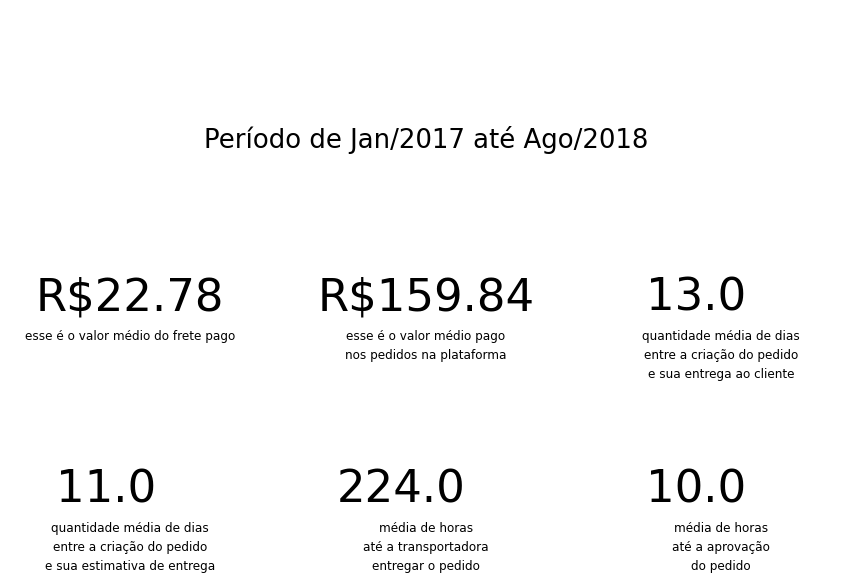

In [135]:
## Objetos referentes as figuras
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Titulo
axs[0, 1].text(0.50, 0.12, 'Período de Jan/2017 até Ago/2018', fontsize=26, ha='center')
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[0, 2].axis('off')

## Cards
# Frete
axs[1, 0].text(0.50, 0.30, f'R${round(df_data_filter["total_freight_value"].mean(), 2)}', fontsize=45, ha='center')
axs[1, 0].text(0.50, 0.12, 'esse é o valor médio do frete pago', fontsize=12, ha='center')
axs[1, 0].axis('off')

# Compra
axs[1, 1].text(0.50, 0.30, f'R${round(df_data_filter["total_payment"].mean(), 2)}', fontsize=45, ha='center')
axs[1, 1].text(0.50, 0.12, 'esse é o valor médio pago', fontsize=12, ha='center')
axs[1, 1].text(0.50, 0.00, 'nos pedidos na plataforma', fontsize=12, ha='center')
axs[1, 1].axis('off')

# Tempo espera
axs[1, 2].text(0.40, 0.30, f'{round(df_data_filter["diff_days_customer_purchase"].mean(), 0)}', fontsize=45, ha='center')
axs[1, 2].text(0.50, 0.12, 'quantidade média de dias', fontsize=12, ha='center')
axs[1, 2].text(0.50, 0.00, 'entre a criação do pedido', fontsize=12, ha='center')
axs[1, 2].text(0.50, -0.12, 'e sua entrega ao cliente', fontsize=12, ha='center')
axs[1, 2].axis('off')

# Tempo espera estimado
axs[2, 0].text(0.40, 0.30, f'{round(df_data_filter["diff_days_customer_estimated"].mean(), 0)}', fontsize=45, ha='center')
axs[2, 0].text(0.50, 0.12, 'quantidade média de dias', fontsize=12, ha='center')
axs[2, 0].text(0.50, 0.00, 'entre a criação do pedido', fontsize=12, ha='center')
axs[2, 0].text(0.50, -0.12, 'e sua estimativa de entrega', fontsize=12, ha='center')
axs[2, 0].axis('off')

# Tempo transportadora
axs[2, 1].text(0.40, 0.30, f'{round(df_data_filter["diff_hours_customer_carrier"].mean(), 0)}', fontsize=45, ha='center')
axs[2, 1].text(0.50, 0.12, 'média de horas', fontsize=12, ha='center')
axs[2, 1].text(0.50, 0.00, 'até a transportadora', fontsize=12, ha='center')
axs[2, 1].text(0.50, -0.12, 'entregar o pedido', fontsize=12, ha='center')
axs[2, 1].axis('off')

# Tempo aprovação
axs[2, 2].text(0.40, 0.30, f'{round(df_data_filter["diff_hours_purchase_approved"].mean(), 0)}', fontsize=45, ha='center')
axs[2, 2].text(0.50, 0.12, 'média de horas', fontsize=12, ha='center')
axs[2, 2].text(0.50, 0.00, 'até a aprovação', fontsize=12, ha='center')
axs[2, 2].text(0.50, -0.12, 'do pedido', fontsize=12, ha='center')
axs[2, 2].axis('off')

plt.show()

In [136]:
## Criando dataframe com os dadoa agrupados
df_payments_grouped = df_order_payments.groupby(['payment_type']).agg({'order_id': 'nunique',                                                                  
                                                                       'payment_value': 'sum'}) \
                                                                  .reset_index()
## Criando coluna referente valor medio gasto por pedido
df_payments_grouped["media_pedido"] = df_payments_grouped["payment_value"] / df_payments_grouped["order_id"]

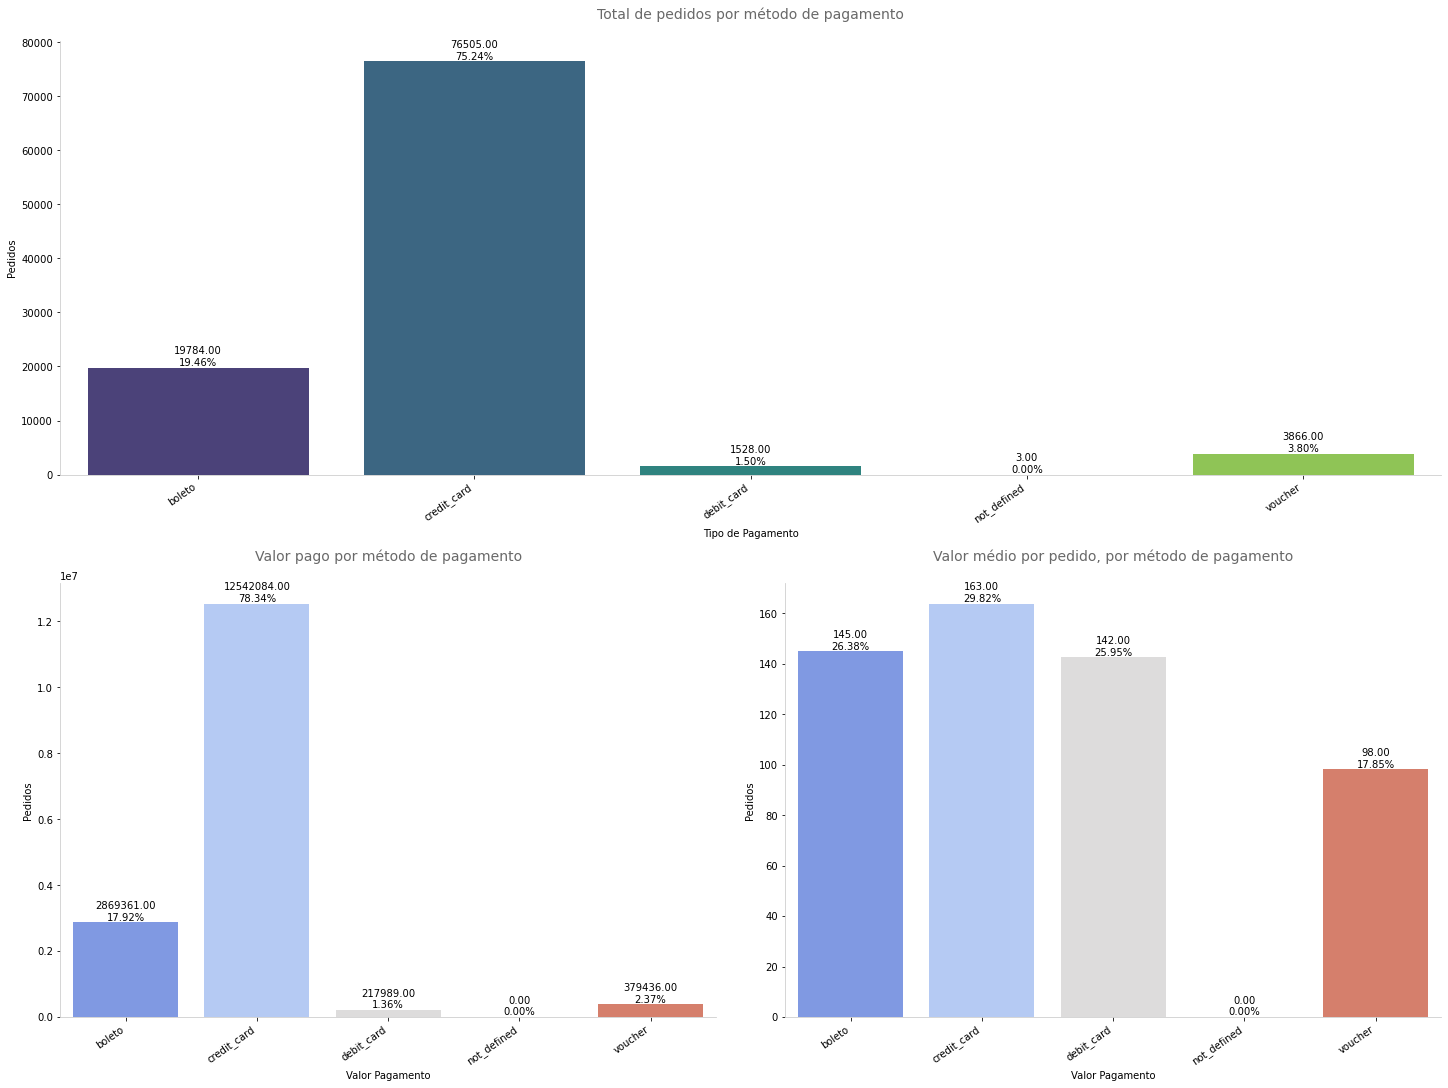

In [137]:
fig = plt.figure(constrained_layout=True, figsize=(20, 15))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

## Gráfico 1
bar_plot(df_payments_grouped, 
               x='payment_type', 
               y="order_id",
               ax=ax1,
               palette='viridis',
               title='Total de pedidos por método de pagamento')
ax1.set_ylabel('Pedidos')
ax1.set_xlabel('Tipo de Pagamento')

## Gráfico 2
bar_plot(df_payments_grouped, 
               x='payment_type', 
               y="payment_value",
               ax=ax2,
               palette='coolwarm',
               title='Valor pago por método de pagamento')
ax2.set_ylabel('Pedidos')
ax2.set_xlabel('Valor Pagamento')

## Gráfico 3
bar_plot(df_payments_grouped, 
               x='payment_type', 
               y="media_pedido",
               ax=ax3,
               palette='coolwarm',
               title='Valor médio por pedido, por método de pagamento')
ax3.set_ylabel('Pedidos')
ax3.set_xlabel('Valor Pagamento')

plt.show()

<a id ='552'></a>
<h5>5.5.2 Clientes</h5>

In [138]:
## Criando dataframe com os dadoa agrupados
df_customer_grouped = df_data.groupby(['customer_state']).agg({'order_id': 'nunique',                                                                  
                                                               'customer_unique_id': 'nunique',
                                                               'total_price': 'sum',
                                                               'total_freight_value': 'sum'}) \
                                                               .reset_index()
## Criando coluna referente valor medio gasto por pedido
df_customer_grouped["media_pedido"] = df_customer_grouped["total_price"] / df_customer_grouped["order_id"]
df_customer_grouped["media_frete"] = df_customer_grouped["total_freight_value"] / df_customer_grouped["order_id"]

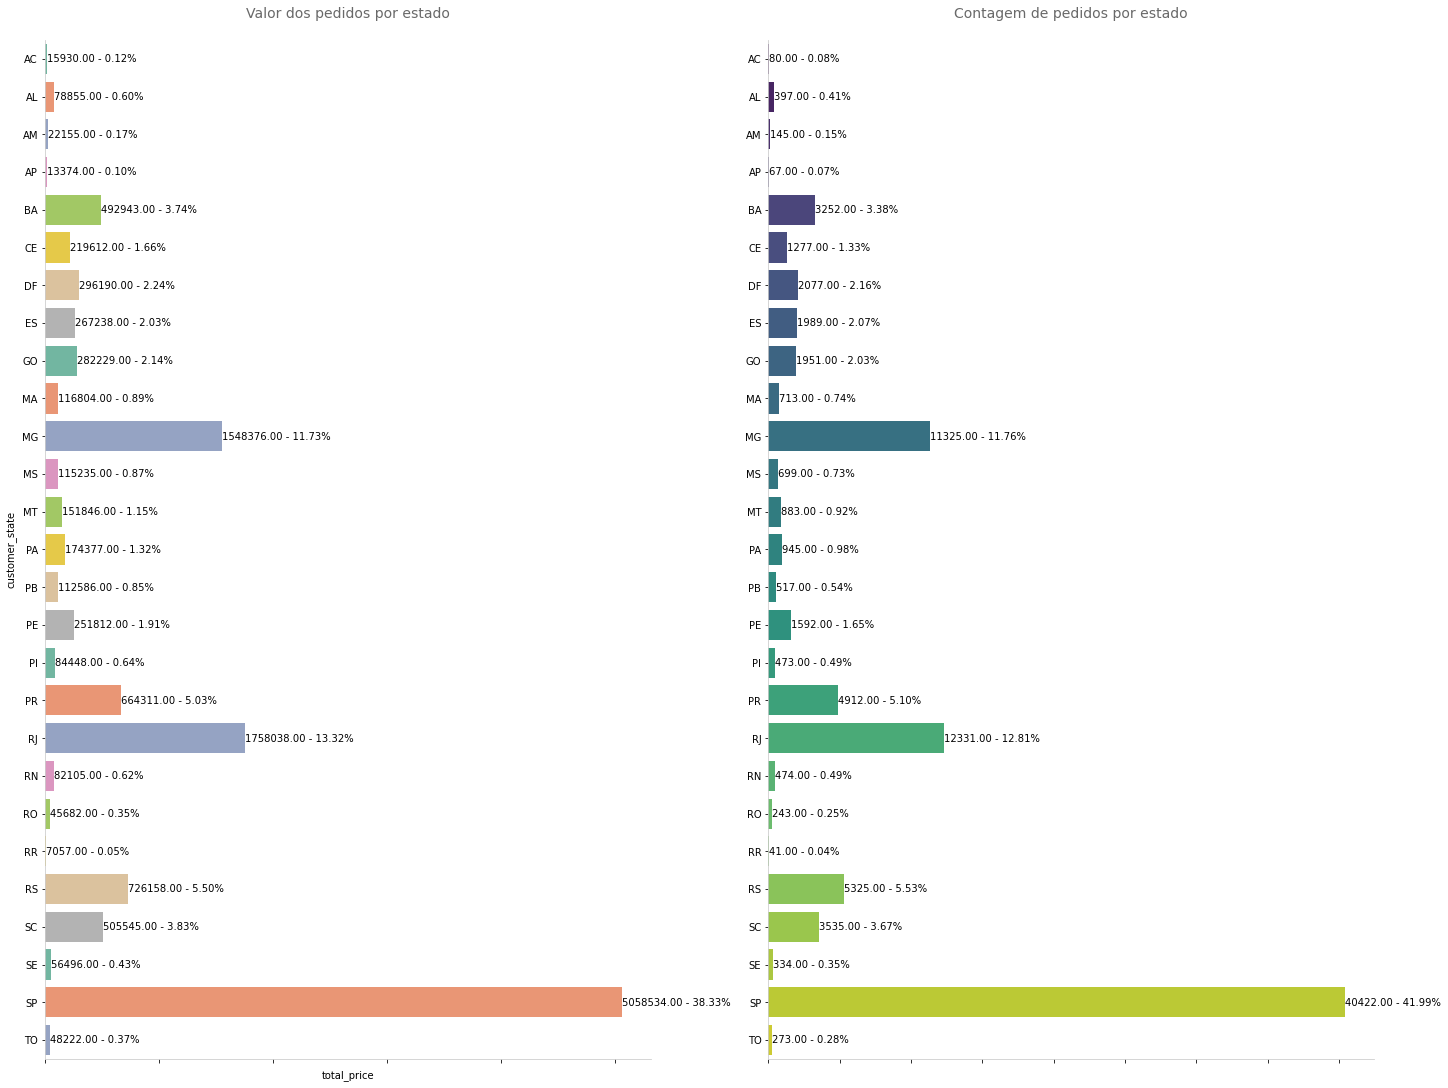

In [139]:
fig = plt.figure(constrained_layout=True, figsize=(20, 15))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])

bar_plot(df_customer_grouped, 
         y='customer_state', 
         x='total_price',
         ax=ax1, 
         orient_horizontal = False,
         palette='Set2', 
         title='Valor dos pedidos por estado')
ax3.set_ylabel('')
ax3.set_xlabel('')

## Gráfico 3
bar_plot(df_customer_grouped, 
         y='customer_state', 
         x='order_id',
         ax=ax2, 
         orient_horizontal = False,
         palette='viridis', 
         title='Contagem de pedidos por estado')
ax2.set_ylabel('')
ax2.set_xlabel('')

plt.show()

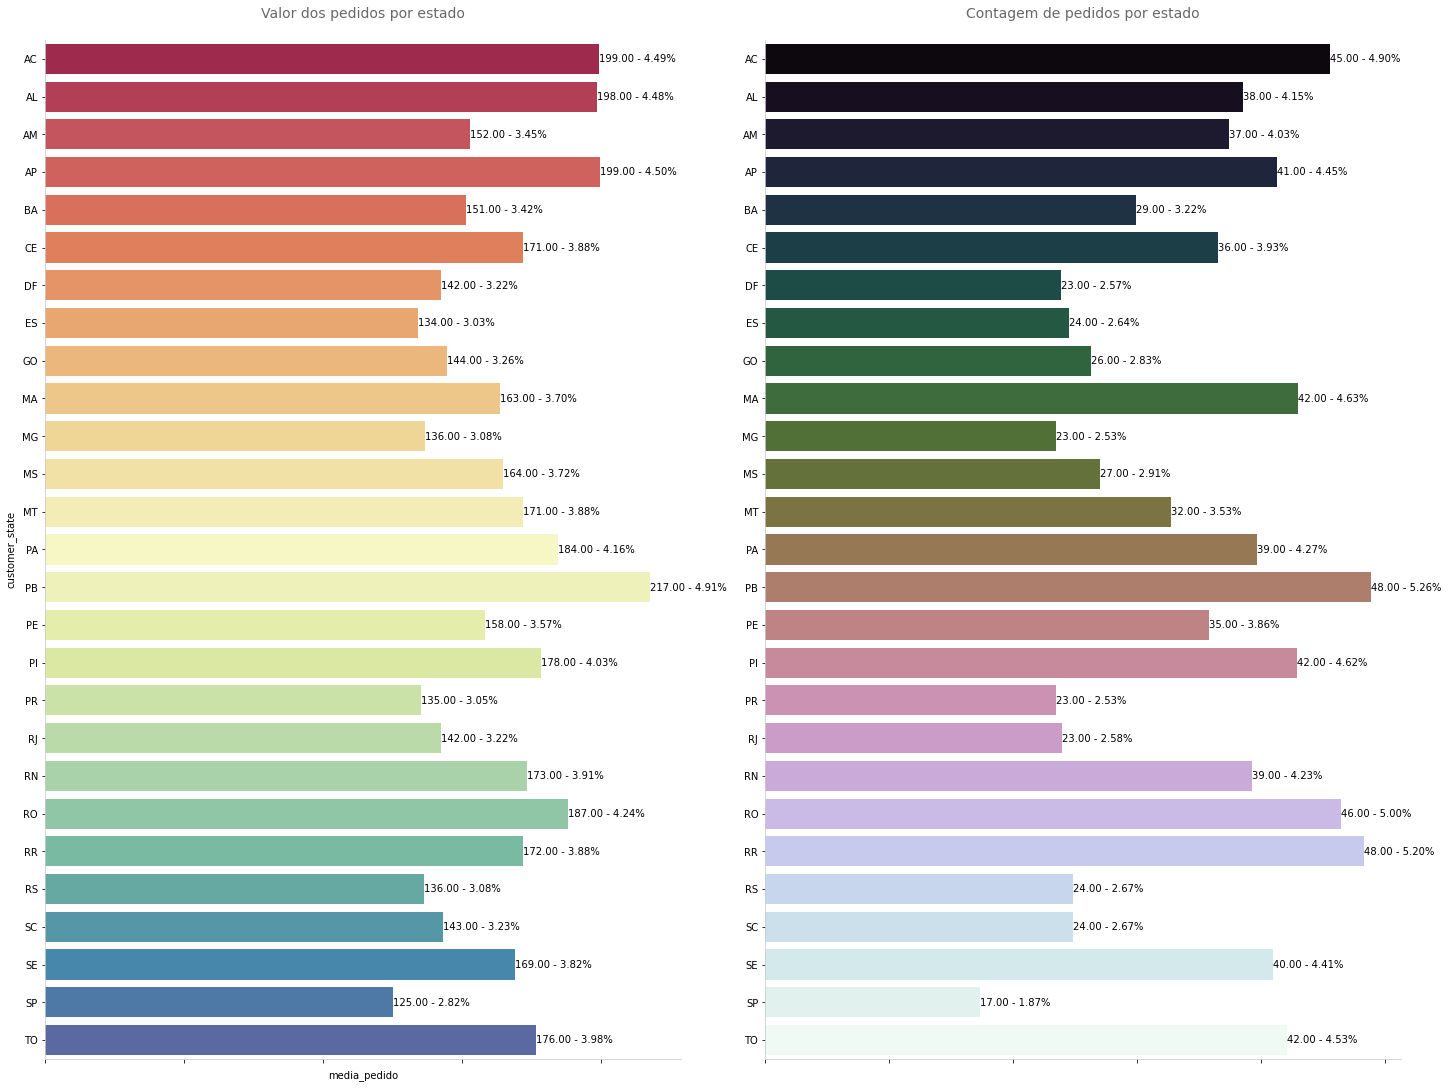

In [140]:
fig = plt.figure(constrained_layout=True, figsize=(20, 15))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])

bar_plot(df_customer_grouped, 
         y='customer_state', 
         x='media_pedido',
         ax=ax1, 
         orient_horizontal = False,
         palette='Spectral', 
         title='Valor dos pedidos por estado')
ax3.set_ylabel('')
ax3.set_xlabel('')

## Gráfico 3
bar_plot(df_customer_grouped, 
         y='customer_state', 
         x='media_frete',
         ax=ax2, 
         orient_horizontal = False,
         palette='cubehelix', 
         title='Contagem de pedidos por estado')
ax2.set_ylabel('')
ax2.set_xlabel('')

plt.show()

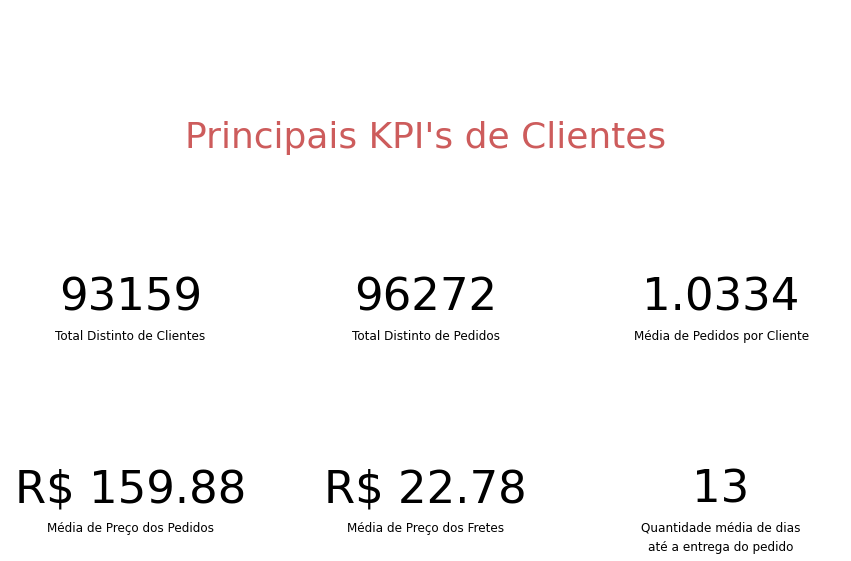

In [141]:
## Objetos referentes as figuras
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Titulo
axs[0, 1].text(0.50, 0.12, "Principais KPI's de Clientes", fontsize=36, ha='center', color="indianred")
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[0, 2].axis('off')

axs[1, 0].text(0.50, 0.30, f'{round(df_data["customer_unique_id"].nunique(), 2)}', fontsize=45, ha='center')
axs[1, 0].text(0.50, 0.12, 'Total Distinto de Clientes', fontsize=12, ha='center')
axs[1, 0].axis('off')

axs[1, 1].text(0.50, 0.30, f'{round(df_data["order_id"].nunique(), 2)}', fontsize=45, ha='center')
axs[1, 1].text(0.50, 0.12, 'Total Distinto de Pedidos', fontsize=12, ha='center')
axs[1, 1].axis('off')

axs[1, 2].text(0.50, 0.30, f'{round(((df_data["order_id"].nunique())/ (df_data["customer_unique_id"].nunique())), 4)}', fontsize=45, ha='center')
axs[1, 2].text(0.50, 0.12, 'Média de Pedidos por Cliente', fontsize=12, ha='center')
axs[1, 2].axis('off')

axs[2, 0].text(0.50, 0.30, f'R$ {round(df_data["total_payment"].mean(), 2)}', fontsize=45, ha='center')
axs[2, 0].text(0.50, 0.12, 'Média de Preço dos Pedidos', fontsize=12, ha='center')
axs[2, 0].axis('off')

axs[2, 1].text(0.50, 0.30, f'R$ {round(df_data["total_freight_value"].mean(), 2)}', fontsize=45, ha='center')
axs[2, 1].text(0.50, 0.12, 'Média de Preço dos Fretes', fontsize=12, ha='center')
axs[2, 1].axis('off')

axs[2, 2].text(0.50, 0.30, f'{round(df_data["diff_days_customer_purchase"].mean())}', fontsize=45, ha='center')
axs[2, 2].text(0.50, 0.12, 'Quantidade média de dias', fontsize=12, ha='center')
axs[2, 2].text(0.50, 0.00, 'até a entrega do pedido', fontsize=12, ha='center')
axs[2, 2].axis('off')

plt.show()

<a id = '6'></a>
<h3>6. Realizando o tratamento das variaveis categoricas</h3>

<a id = '61'></a>
<h4>6.1. Analisando os dados dos parametros selecionados</h4>

In [142]:
## Distribuição de frequência
frequency_distribution(df_data, 'customer_city')

,Frequencia Absoluta,Frequencia Relativa
customer_city,,
sao paulo,15019,15.600590
rio de janeiro,6594,6.849344
belo horizonte,2687,2.791050
brasilia,2068,2.148080
curitiba,1486,1.543543
...,...,...
humildes,1,0.001039
rio grande do piaui,1,0.001039
iaras,1,0.001039


In [143]:
## Distribuição de frequência
frequency_distribution(df_data, 'customer_state')

,Frequencia Absoluta,Frequencia Relativa
customer_state,,
SP,40422,41.987286
RJ,12331,12.808501
MG,11325,11.763545
RS,5325,5.531203
PR,4912,5.102210
...,...,...
RO,243,0.252410
AM,145,0.150615
AC,80,0.083098


In [144]:
## Distribuição de frequência
frequency_distribution(df_data, 'order_status')

,Frequencia Absoluta,Frequencia Relativa
order_status,,
delivered,96266,99.993768
canceled,6,0.006232


In [145]:
## Distribuição de frequência
frequency_distribution(df_data, 'payment_sequential_categ')

,Frequencia Absoluta,Frequencia Relativa
payment_sequential_categ,,
apenas_1,93325,96.938882
menor_igual_5,2836,2.945820
menor_igual_10,83,0.086214
menor_igual_20,25,0.025968
menor_igual_30,3,0.003116


<a id ='62'></a>
<h4>6.2. Aplicando o One-Hot-Encondig</h4>

Podemos identificar que a variável _customer_city_ é muito puverizada no dataset, isto é, existem muitos registros dessa variável, e aparentemente não acrescentaria muito na análise. Uma outra muito pulverizada é a _customer_state_, contudo, para essa variável criaremos outra que corresponderá a região do cliente, nesse caso, se o cliente for de SP, então a sua região será a Sudeste, dessa forma diminuimos essa pulverização de dados.

In [146]:
def region(state):
    if state in ['AC', 'RO', 'AM', 'PA', 'RR', 'AP', 'TO']:
        return "Norte"
    elif state in ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']:
        return "Nordeste"
    elif state in ['MT', 'GO', 'MS', 'DF']:
        return "Centro_Oeste"
    elif state in ['MG', 'ES', 'RJ', 'SP']:
        return "Sudeste"
    else:
        return "Sul"
    
df_data["customer_region"] = df_data["customer_state"].apply(lambda state: region(state))

In [147]:
## Distribuição de frequência
frequency_distribution(df_data, 'customer_region')

,Frequencia Absoluta,Frequencia Relativa
customer_region,,
Sudeste,66067,68.625353
Sul,13772,14.305302
Nordeste,9029,9.378636
Centro_Oeste,5610,5.827239
Norte,1794,1.863470


Uma vez criada a coluan com os dados das regiões, será aplicado o tratamento onehot encoder, que basicamente transforma as observações categóricas em colunas no dataframe

In [148]:
columns = ["customer_region", "payment_sequential_categ", "order_status"]

In [149]:
# Criando o objeto onehotencoder
one_hot_encoding = OneHotEncoder()

In [150]:
# Criando um dataframe com as colunas
df_enc = pd.DataFrame(one_hot_encoding.fit_transform(df_data[columns]).toarray())

# Definindo o nome das colunas captando o nome das features
df_enc.columns = one_hot_encoding.get_feature_names(columns)

# Remover do dataframe original a coluna que esta sendo usada no processo
df_data.drop(columns, axis = 1, inplace = True)
df_data.drop(['customer_city', 'customer_state'], axis = 1, inplace = True)

# Realizar um concat
df_data_treat = pd.concat([df_data, df_enc], axis = 1)

In [151]:
## Verificando os dados
df_data_treat.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_hours_purchase_approved,diff_hours_carries_purchase,diff_hours_customer_carrier,diff_days_customer_purchase,diff_days_customer_estimated,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,payment_installments,payment_sequential,count_order_item_id,count_product_id,count_seller_id,total_price,total_freight_value,total_payment,customer_region_Centro_Oeste,customer_region_Nordeste,customer_region_Norte,customer_region_Sudeste,customer_region_Sul,payment_sequential_categ_apenas_1,payment_sequential_categ_menor_igual_10,payment_sequential_categ_menor_igual_20,payment_sequential_categ_menor_igual_30,payment_sequential_categ_menor_igual_5,order_status_canceled,order_status_delivered
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,0.276944,163.706111,47.793889,8.812500,10.558623,0.0,146.87,0.0,0,0.0,2,1,1,1,1,124.99,21.88,146.87,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,0.168889,68.443056,331.438889,16.661748,7.471308,0.0,335.48,0.0,0,0.0,8,1,1,1,1,289.00,46.48,335.48,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,24.190278,550.387500,75.464167,26.077153,-1.749201,0.0,157.73,0.0,0,0.0,7,1,1,1,1,139.94,17.79,157.73,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.378056,343.267778,16.695278,14.998461,12.330266,0.0,173.30,0.0,0,0.0,1,1,1,1,1,149.94,23.36,173.30,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,0.310833,29.408333,245.663333,11.461319,5.127917,0.0,252.25,0.0,0,0.0,8,1,1,1,1,230.00,22.25,252.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id = '7'></a>
<h3>7. Seleção de variáveis</h3>

<p>Temos alguns hiperparâmetros com valores categoricos, sendo assim precisaremos submeter tais dados aos processos de <i>Label Encoding</i> ou <i>One hot Encoding</i>

In [152]:
## Setando apenas as variaveis numericas no dataframe final
df_data_treat_final = df_data_treat.select_dtypes(include = np.number)

In [153]:
## Visualizando os primeiros dados
df_data_treat_final.head()

,diff_hours_purchase_approved,diff_hours_carries_purchase,diff_hours_customer_carrier,diff_days_customer_purchase,diff_days_customer_estimated,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,payment_installments,payment_sequential,count_order_item_id,count_product_id,count_seller_id,total_price,total_freight_value,total_payment,customer_region_Centro_Oeste,customer_region_Nordeste,customer_region_Norte,customer_region_Sudeste,customer_region_Sul,payment_sequential_categ_apenas_1,payment_sequential_categ_menor_igual_10,payment_sequential_categ_menor_igual_20,payment_sequential_categ_menor_igual_30,payment_sequential_categ_menor_igual_5,order_status_canceled,order_status_delivered
0,0.276944,163.706111,47.793889,8.812500,10.558623,0.0,146.87,0.0,0,0.0,2,1,1,1,1,124.99,21.88,146.87,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.168889,68.443056,331.438889,16.661748,7.471308,0.0,335.48,0.0,0,0.0,8,1,1,1,1,289.00,46.48,335.48,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,24.190278,550.387500,75.464167,26.077153,-1.749201,0.0,157.73,0.0,0,0.0,7,1,1,1,1,139.94,17.79,157.73,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.378056,343.267778,16.695278,14.998461,12.330266,0.0,173.30,0.0,0,0.0,1,1,1,1,1,149.94,23.36,173.30,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.310833,29.408333,245.663333,11.461319,5.127917,0.0,252.25,0.0,0,0.0,8,1,1,1,1,230.00,22.25,252.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
